In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
sns.set_theme(style='white', palette='rainbow', font_scale=1.2)

In [2]:
data = pd.read_csv("data/student-mat.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data.shape

(395, 33)

In [4]:
#check missing data -> There are no missing data
print(f"Lenght: {len(data)}")
print(f"Shape: {data.shape}")
print(f"Columns: {data.columns}")
#data.isnull().any()

Lenght: 395
Shape: (395, 33)
Columns: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


## Visualize Resp

In [5]:
fig = plt.figure(figsize=(20, 16))
data.loc[data.G3 < 12, 'G3_binary'] = 0
data.loc[data.G3 >= 12, 'G3_binary'] = 1
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_binary
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,0.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,0.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,0.0


<Figure size 2000x1600 with 0 Axes>

<AxesSubplot: xlabel='G3_binary', ylabel='count'>

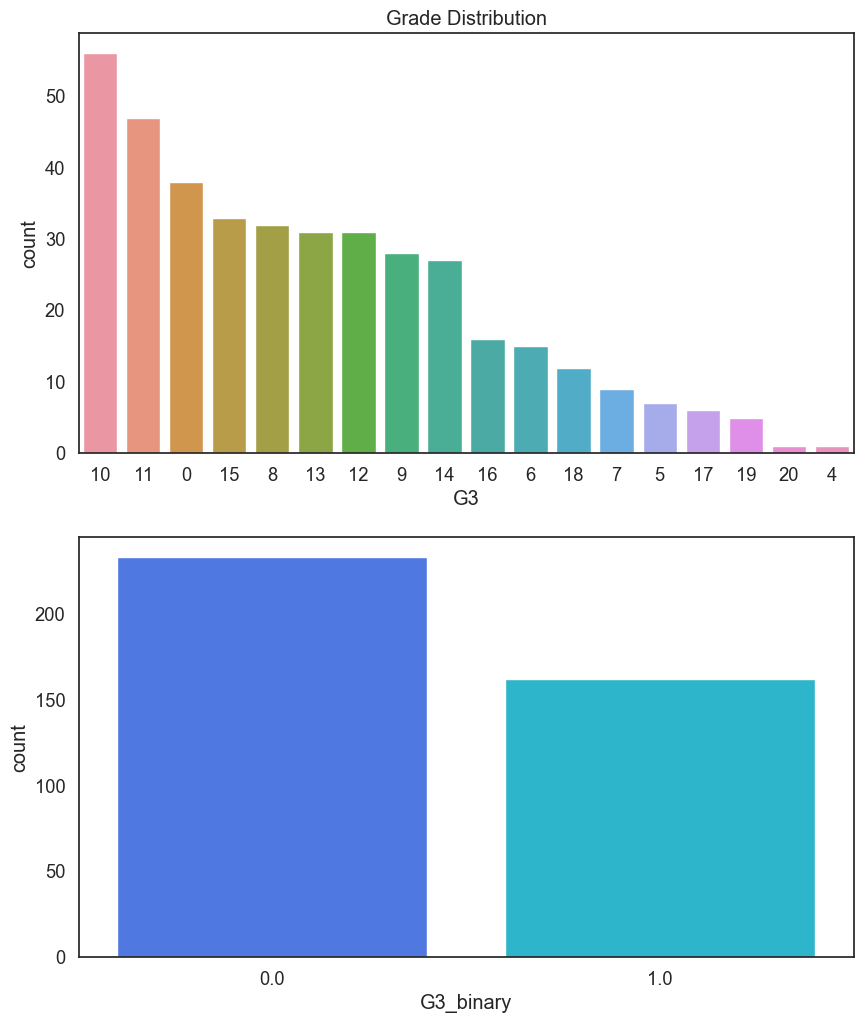

In [6]:
fig = plt.figure(figsize=(10, 12))
fig.add_subplot(2, 1, 1)
sns.countplot(x='G3', data=data, order=data['G3'].value_counts().index).set_title("Grade Distribution")
fig.add_subplot(2, 1, 2)
sns.countplot(x=data.G3_binary, order=data.G3_binary.value_counts().index)

In [7]:
# plt.figure(figsize=(25, 16))
# sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='Blues')

### Age & Gender

<AxesSubplot: xlabel='finalGrade', ylabel='count'>

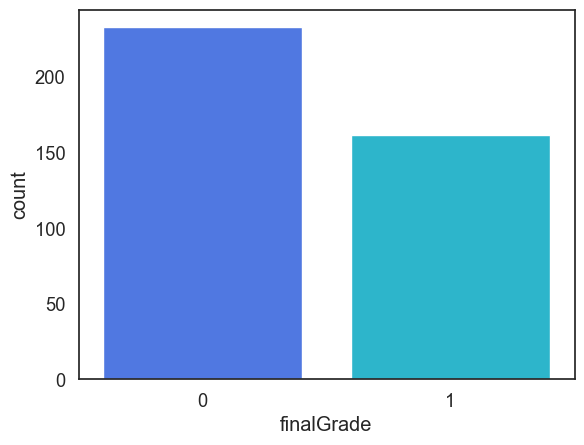

In [8]:
### Marking Final Grade as Categorical Value & Viewing their Count
data['finalGrade'] = np.where(data['G3'] >= 12, 'Pass', 'Fail')
data['finalGrade'].replace(['Fail', 'Pass'],[0, 1], inplace=True)
sns.countplot(x = 'finalGrade',  data = data)

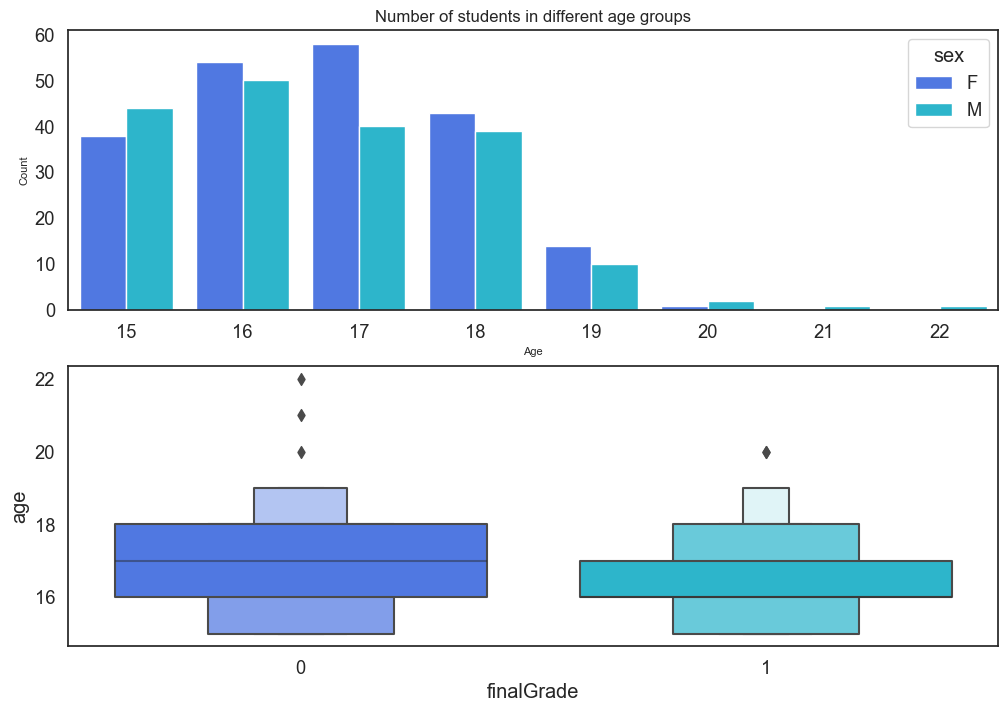

In [9]:
fig, axes = plt.subplots(2, 1, figsize= (12, 8))

age_pl = sns.countplot(data=data, x = 'age' ,hue='sex', ax = axes[0])
age_pl.axes.set_title('Number of students in different age groups',fontsize=12)
age_pl.set_xlabel("Age",fontsize=8)
age_pl.set_ylabel("Count",fontsize=8)


sns.boxenplot(x = 'finalGrade', y = 'age', data = data, ax = axes[1] )
plt.show()

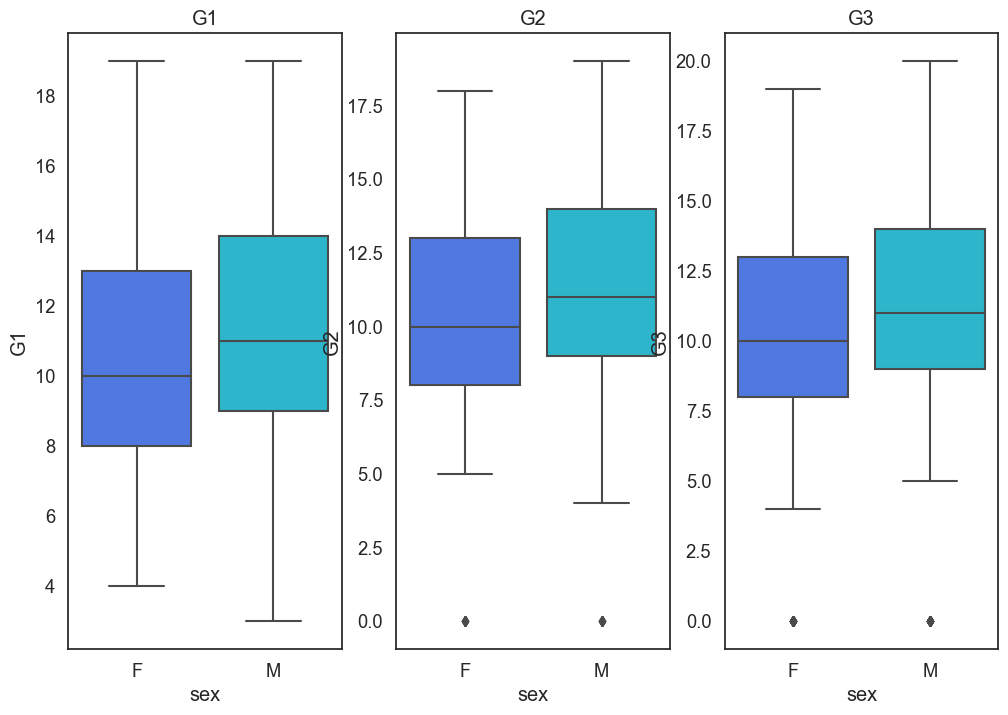

In [10]:
#Whether there's a gender difference in grade distribution in G3
fig, axes = plt.subplots(1, 3, figsize= (12, 8))
ax1 = sns.boxplot(data= data, x= 'sex', y= 'G1', ax= axes[0])
ax1.set_title('G1')
ax2 = sns.boxplot(data= data, x= 'sex', y= 'G2', ax= axes[1])
ax2.set_title('G2')
ax3 = sns.boxplot(data= data, x= 'sex', y= 'G3', ax= axes[2])
ax3.set_title('G3')
plt.show()

Text(0.5, 0, 'age')

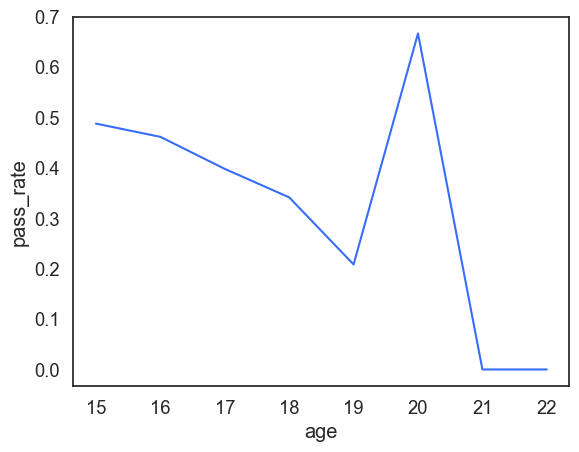

In [11]:
age_data = data.groupby('age')['finalGrade'].agg([('pass_rate','mean'),('nobs','count')]).reset_index(drop=False)
sns.lineplot(x = age_data.age, y= age_data['pass_rate'])
plt.xlabel('age')


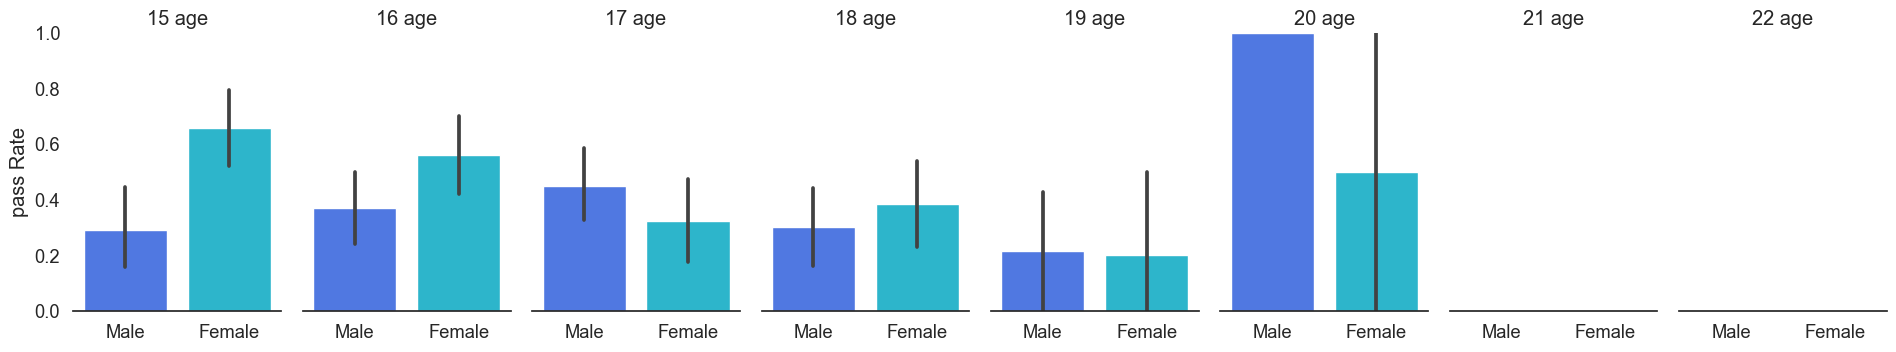

In [12]:
g = sns.catplot(
    data=data, x="sex", y="finalGrade", col="age",
    kind="bar", height=4, aspect=.6,
)
g.set_axis_labels("", "pass Rate")
g.set_xticklabels(["Male", "Female"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True)

### Study-related

Text(0.5, 1.0, 'Internet Access vs G3')

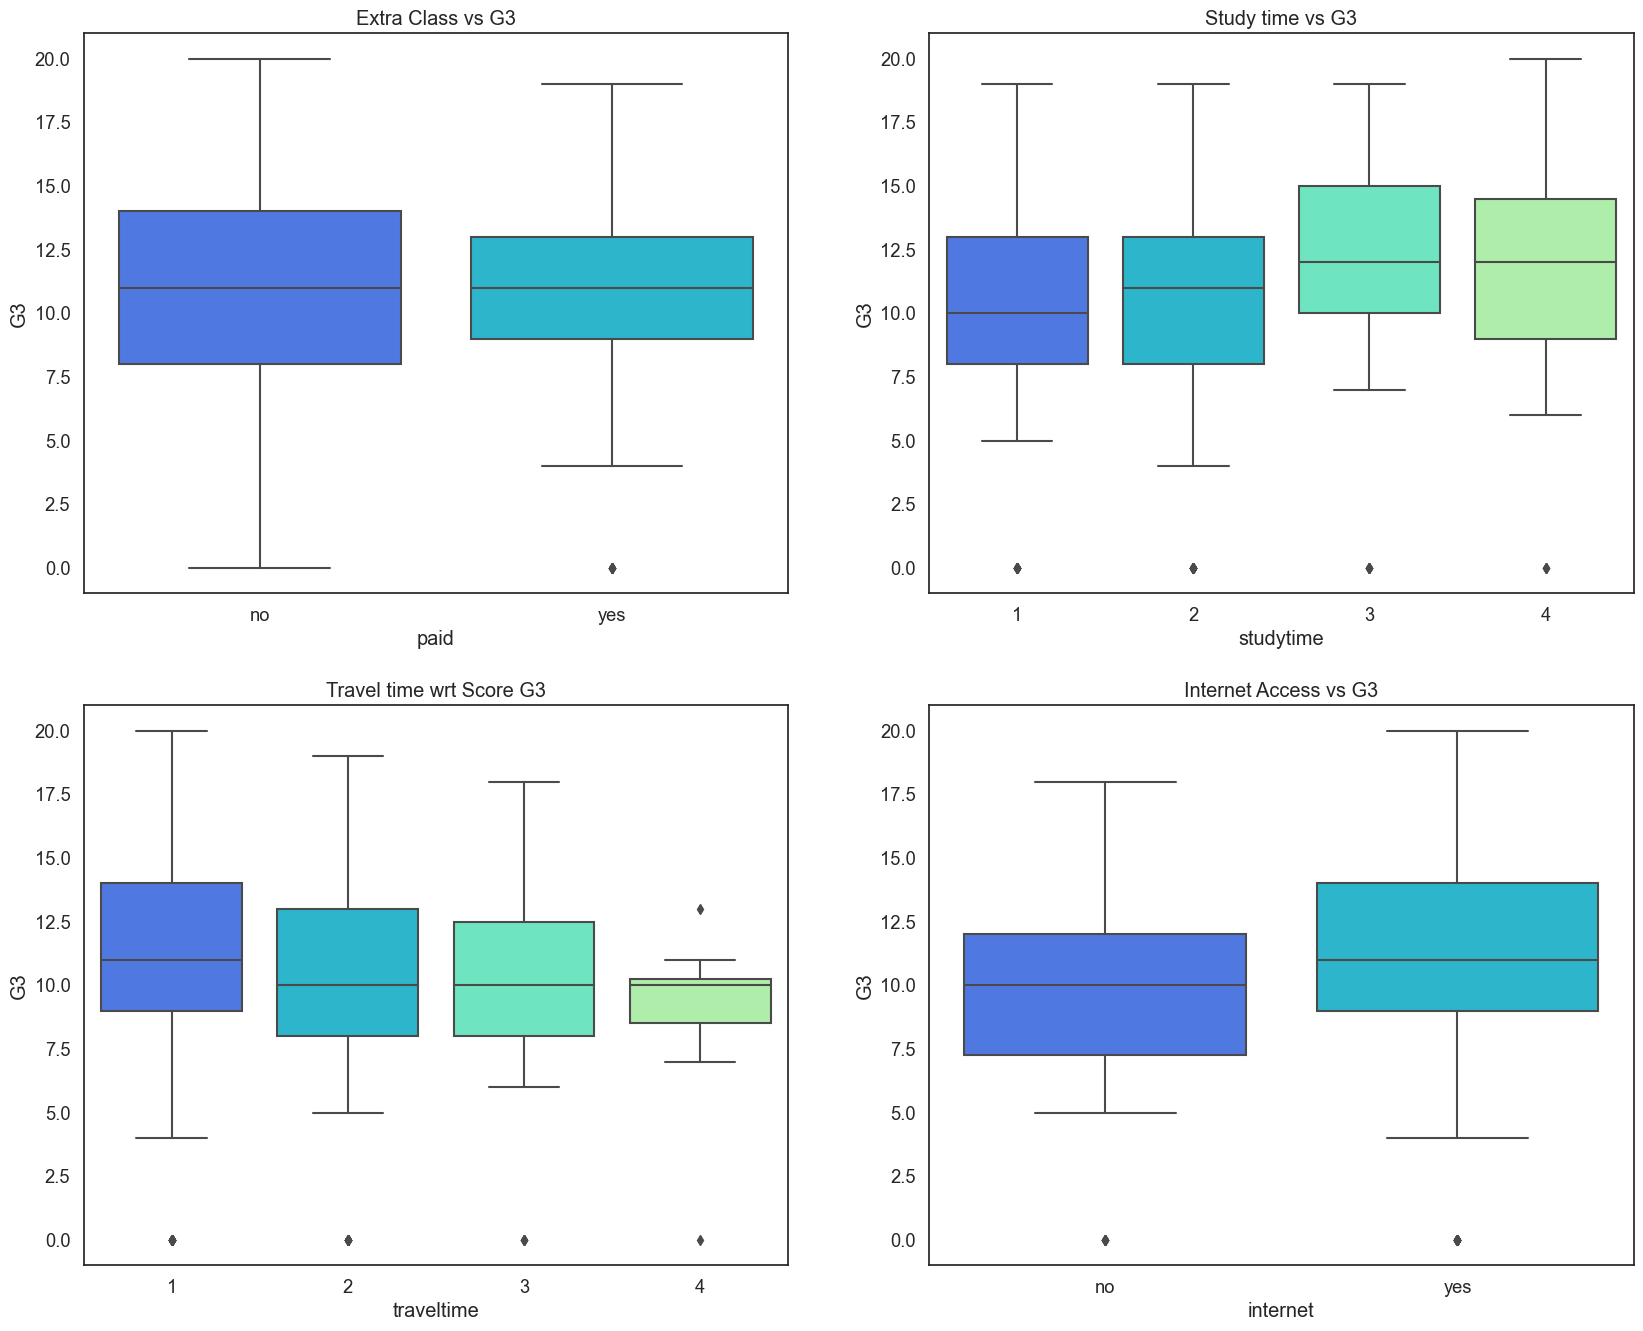

In [13]:
fig = plt.figure(figsize=(20, 16))
fig.add_subplot(2, 2, 1)
sns.boxplot(x='paid', y='G3', data=data).set_title('Extra Class vs G3')

fig.add_subplot(2, 2, 2)
sns.boxplot(x='studytime', y='G3', data=data).set_title('Study time vs G3')

fig.add_subplot(2, 2, 3)
sns.boxplot(x='traveltime', y='G3', data=data).set_title('Travel time wrt Score G3')

fig.add_subplot(2, 2, 4)
sns.boxplot(x='internet', y='G3', data=data).set_title('Internet Access vs G3')

## Address: Rural / Urban

Text(0, 0.5, 'Count')

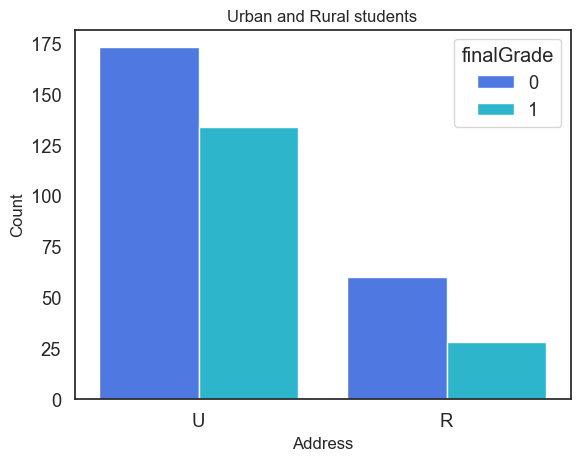

In [14]:
add_plt = sns.countplot(data = data, x ='address', hue = "finalGrade")
add_plt.axes.set_title('Urban and Rural students', fontsize = 12)
add_plt.set_xlabel('Address', fontsize = 12)
add_plt.set_ylabel('Count', fontsize = 12)

### Parents Education
Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Text(0.5, 0.98, 'Educated families result in Potentail higher grades in G1 & G2')

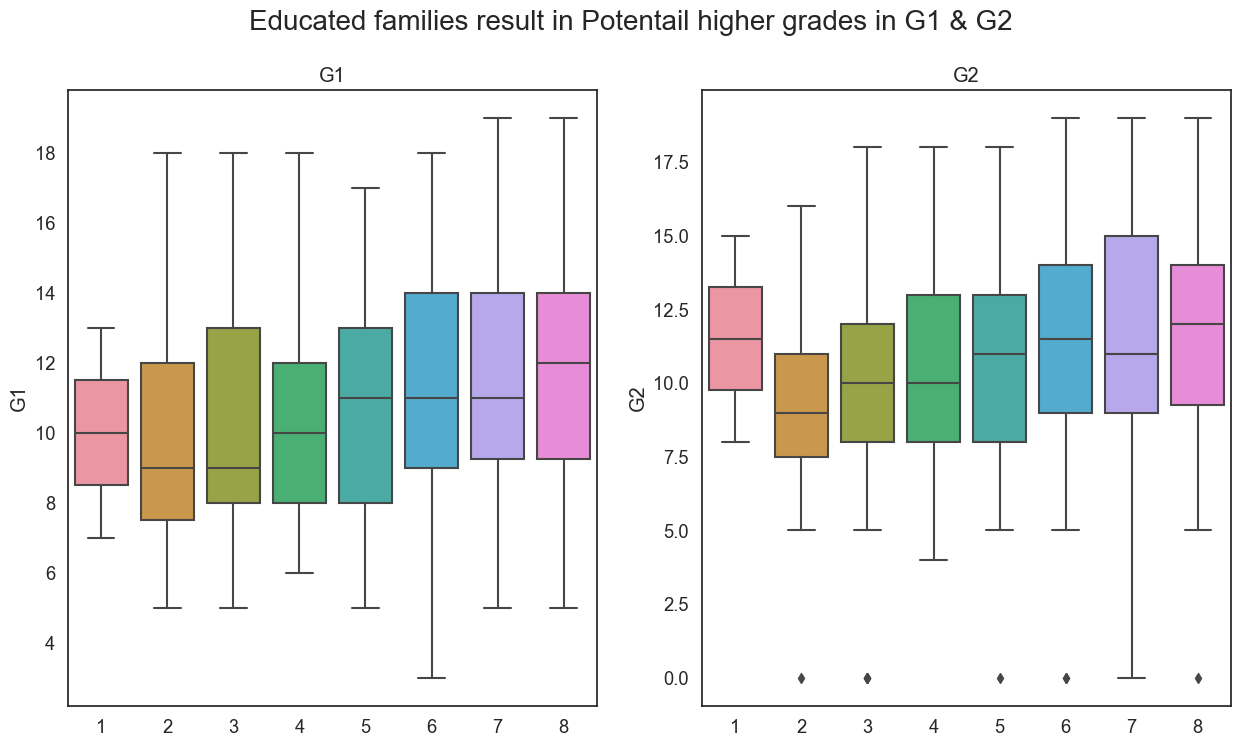

In [15]:
family_ed = data['Fedu'] + data['Medu'] 
# add_plt = sns.countplot(data = data, x =family_ed, hue = "Final Grade")

fig, axes = plt.subplots(1, 2, figsize= (15, 8))
ax1 = sns.boxplot(data= data, x= family_ed, y= 'G1', ax= axes[0])
ax1.set_title('G1')
ax2 = sns.boxplot(data= data, x= family_ed, y= 'G2', ax= axes[1])
ax2.set_title('G2')

fig.suptitle('Educated families result in Potentail higher grades in G1 & G2', fontsize = 20)

### Social Factors

Text(0.5, 1.0, 'Romantic Relation vs G3')

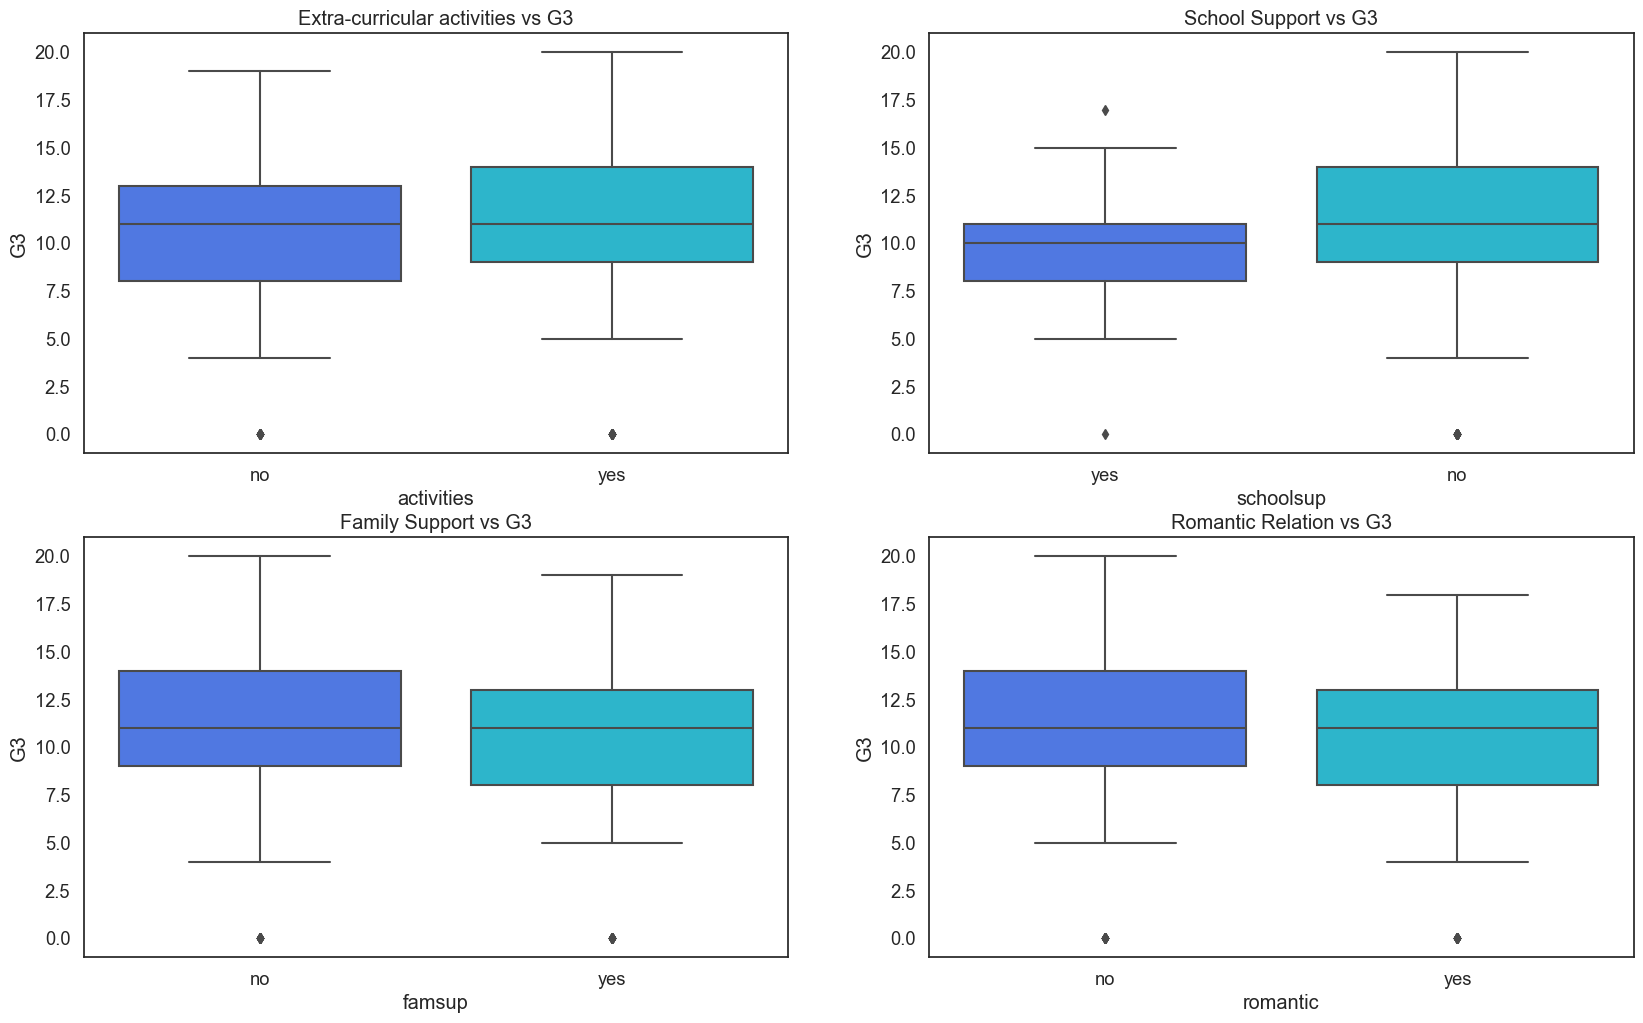

In [16]:
fig = plt.figure(figsize=(20, 12))
fig.add_subplot(2, 2, 1)
sns.boxplot(x='activities', y='G3', data=data).set_title('Extra-curricular activities vs G3')
fig.add_subplot(2, 2, 2)
sns.boxplot(x='schoolsup', y='G3', data=data).set_title('School Support vs G3')
fig.add_subplot(2, 2, 3)
sns.boxplot(x='famsup', y='G3', data=data).set_title('Family Support vs G3')
fig.add_subplot(2, 2, 4)
sns.boxplot(x='romantic', y='G3', data=data).set_title('Romantic Relation vs G3')

## Behavioral

Text(0.5, 1.0, 'Walc vs G3')

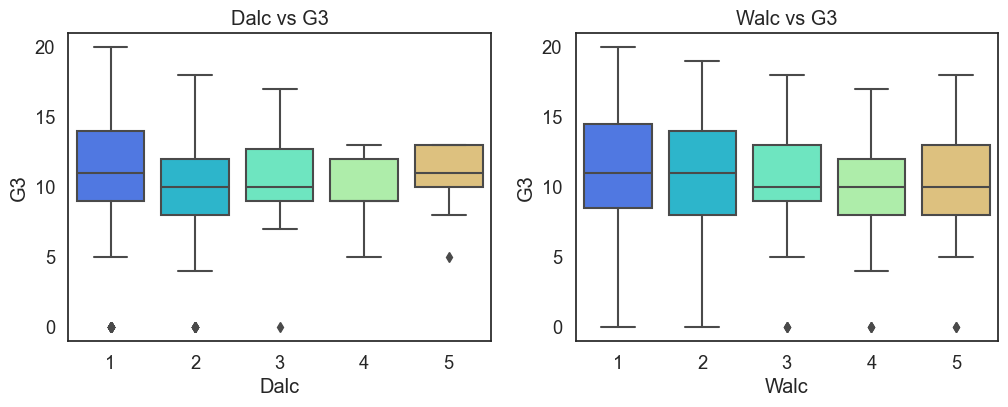

In [17]:
fig = plt.figure(figsize=(12, 4))
fig.add_subplot(1, 2, 1)
sns.boxplot(x='Dalc', y='G3', data=data).set_title('Dalc vs G3')
fig.add_subplot(1, 2, 2)
sns.boxplot(x='Walc', y='G3', data=data).set_title('Walc vs G3')

Text(0.5, 1.0, 'romantic vs G3')

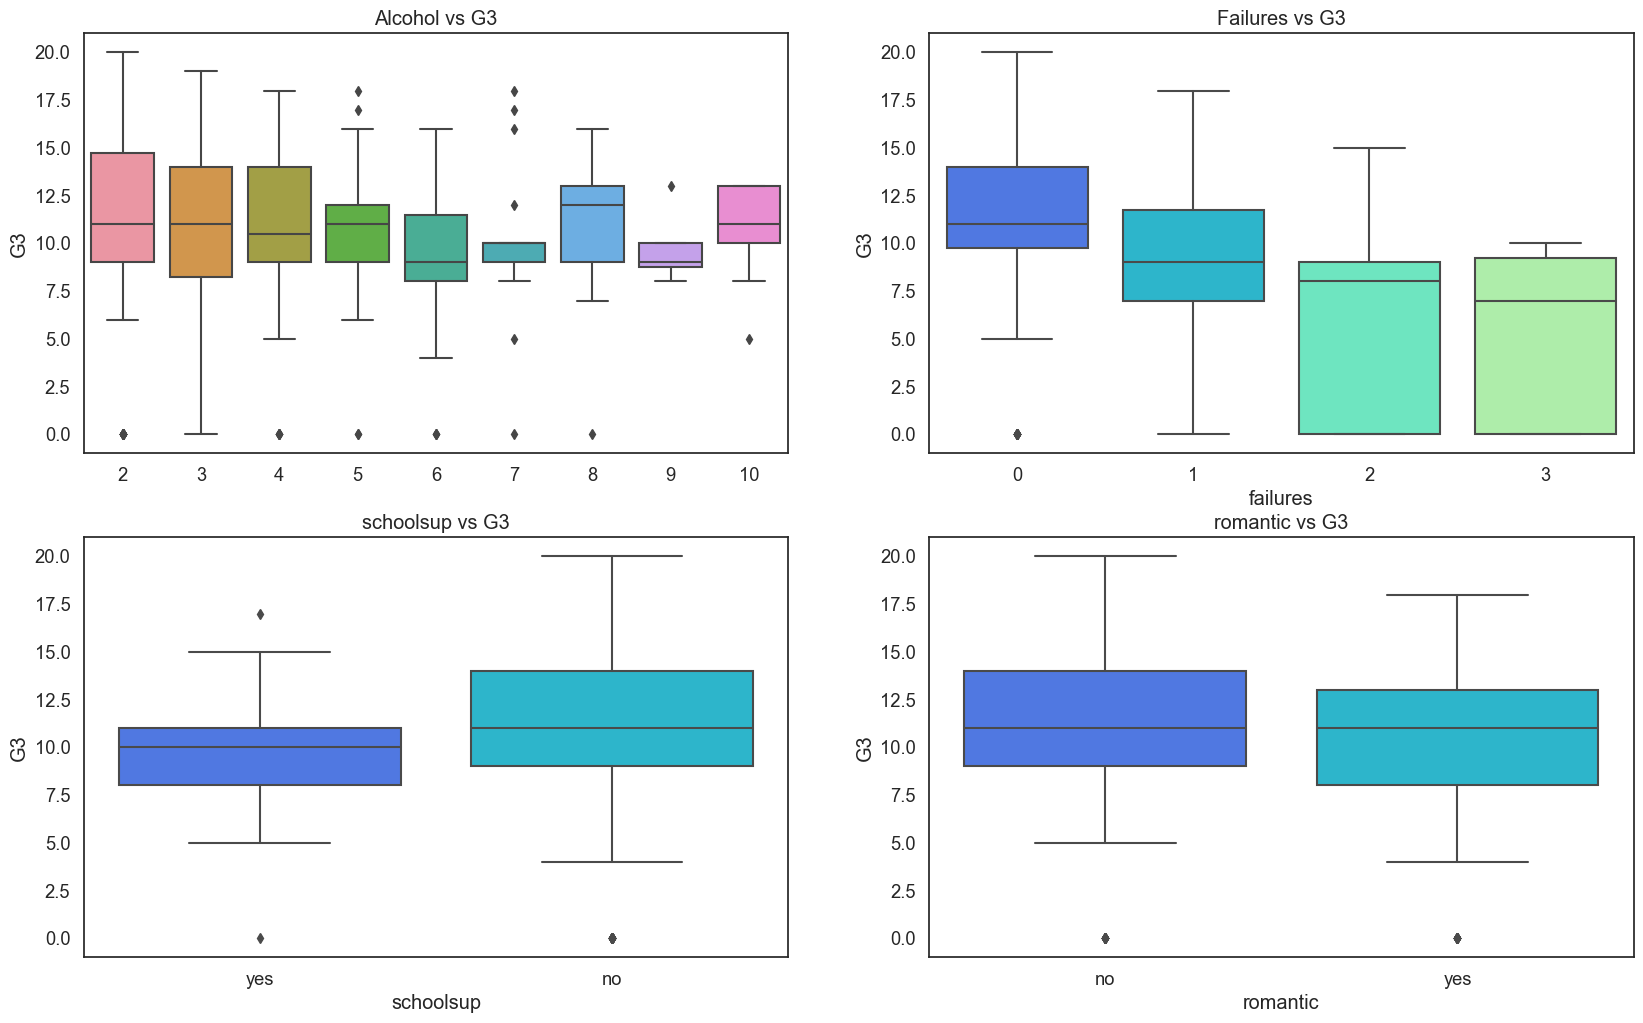

In [18]:
fig = plt.figure(figsize=(20, 12))
fig.add_subplot(2, 2, 1)
alc = data['Dalc'] + data['Walc']
sns.boxplot(x=alc, y='G3',  data=data).set_title('Alcohol vs G3')
fig.add_subplot(2, 2, 2)
sns.boxplot(x='failures', y='G3',  data=data).set_title('Failures vs G3')
fig.add_subplot(2, 2, 3)
sns.boxplot(x='schoolsup', y='G3',  data=data).set_title('schoolsup vs G3')
fig.add_subplot(2, 2, 4)
sns.boxplot(x='romantic', y='G3',  data=data).set_title('romantic vs G3')

Text(0.5, 1.0, 'G2 versus G3')

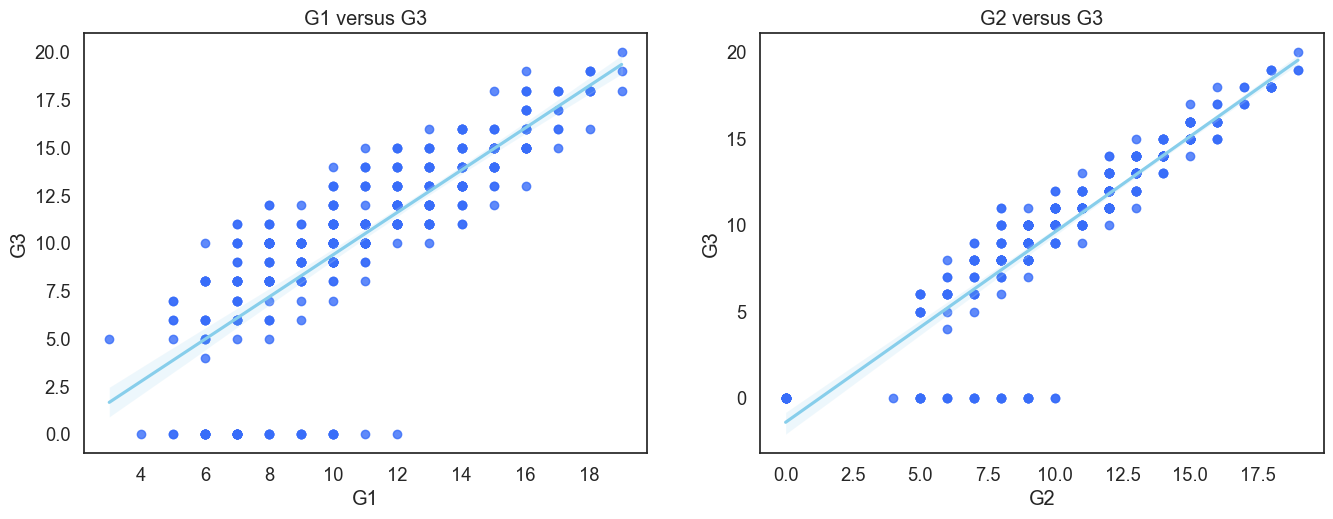

In [19]:
fig = plt.figure(figsize=(16, 12))
fig.add_subplot(2, 2, 1)
sns.regplot(x='G1', y='G3', data=data, line_kws={'color': 'skyblue'}).set_title('G1 versus G3')
fig.add_subplot(2, 2, 2)
sns.regplot(x='G2', y='G3', data=data, line_kws={'color': 'skyblue'}).set_title('G2 versus G3')

## Pre-Processsing

In [20]:
# read data
data = pd.read_csv("data/student-mat.csv")

# binary_mapping
data['school'] = data['school'].map({'GP':0, 'MS':1})
data['sex'] = data['sex'].map({'F':0, 'M':1})
data['famsize'] = data['famsize'].map({'GT3':0, 'LE3':1})
data['address'] = data['address'].map({'R':0, 'U':1})
data['Pstatus'] = data['Pstatus'].map({'A':0, 'T':1})

binary_mapping = {'yes':1, 'no':0}
data['schoolsup'] = data['schoolsup'].map(binary_mapping)
data['famsup'] = data['famsup'].map(binary_mapping)
data['paid'] = data['paid'].map(binary_mapping)
data['activities'] = data['activities'].map(binary_mapping)
data['nursery'] = data['nursery'].map(binary_mapping)
data['higher'] = data['higher'].map(binary_mapping)
data['internet'] = data['internet'].map(binary_mapping)
data['romantic'] = data['romantic'].map(binary_mapping)

# level-encoding
job_encoding = {'other':0, 'at_home': 1, 'services':2, 'health': 3, 'teacher': 4}
data['Mjob'] = data['Mjob'].map(job_encoding)
data['Fjob'] = data['Fjob'].map(job_encoding)
data['reason'] = data['reason'].map({'other': 0, 'home': 1, 'reputation': 2, 'course': 3})
data['guardian'] = data['guardian'].map({'other': 0, 'mother': 1, 'father': 2})

# combine Dalc and Walc into alc
data.loc[:,'alc']= data['Dalc'] + data['Walc']
# drop Dalc and Walc 
data = data.drop(columns=['Dalc', 'Walc'])
# drop G1 and G2
#data = data.drop(columns=['G1', 'G2'])

data.head(3)
data.dtypes

school        int64
sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
alc           int64
dtype: object

In [21]:
# data.isna().sum()

In [22]:
X = data
y = data.G3

In [23]:
from sklearn.feature_selection import SelectKBest, chi2
k_best = SelectKBest(score_func=chi2, k=10)
k_best.fit(X, y)
df_score = pd.Series(data=k_best.scores_, index=X.columns)
df_score.sort_values(ascending=False)[1:6]
features_selected = df_score.nlargest(3).index

absences    648.166848
G2          451.680952
G1          319.716427
failures    140.934898
alc          41.036997
dtype: float64

In [24]:

features_selected

Index(['G3', 'absences', 'G2'], dtype='object')

## Train Test Split

In [25]:
# train = split
from sklearn.model_selection import train_test_split, KFold, cross_val_score
k_fold = KFold(n_splits=10, random_state=1, shuffle=True)
train, test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,health,absences,G1,G2,G3,alc
23,0,1,16,1,1,1,2,2,0,0,...,0,5,4,4,5,0,13,13,12,6
296,0,0,19,1,0,1,4,4,3,0,...,0,2,3,4,2,0,10,9,0,5
13,0,1,15,1,0,1,4,3,4,0,...,0,5,4,3,3,2,10,10,11,3
249,0,1,16,1,0,1,0,2,0,0,...,0,4,3,2,5,0,13,15,15,6
61,0,0,16,1,0,1,1,1,2,2,...,1,5,5,5,5,6,10,8,11,10


In [26]:
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import Ridge
# classifiers = {
#     'Linear Regression' : LinearRegression(),
#     'Lasso': Lasso(),
#     'Ridge': Ridge(),
# }

# for key, clf in classifiers.items():
#     print(key, clf)
#     score = cross_val_score(clf, X_train, y_train, cv=k_fold, scoring='neg_mean_squared_error')
#     rmse = np.sqrt(-score)
#     rmse_score = np.mean(rmse)
#     print('RMSE score with CV of {0} is {1}'.format(key, rmse_score))

In [27]:
# lm_fit = LinearRegression().fit(X_train, y_train)
# lm_fit.coef_

In [28]:
# pred_score = lasso_fit.predict(X[selected])
# df_res = pd.DataFrame([pred_score,y], index=["pred","true"]).T
# df_res.loc[pred_score < 12] = 0
# df_res.loc[pred_score >= 12] = 1
# y[y < 12] = 0
# y[y >= 12] = 1
# # df_res
# np.mean(df_res.pred == df_res.true)

# Linear Regression Model

In [29]:
train = pd.DataFrame(train)
# train.head()

#### G3 ~  absences * failures  + schoolsup + romantic

In [30]:
df_score.sort_values(ascending=False)[1:8]

absences     648.166848
G2           451.680952
G1           319.716427
failures     140.934898
alc           41.036997
Fjob          32.603524
schoolsup     28.319018
dtype: float64

In [31]:
import statsmodels.formula.api as smf
# function to test prediction accuracy
def acc(lm, _Xtest, _ytest):
    pred_test = lm.predict(_Xtest)
    data = pd.concat([pred_test, _ytest], axis = 1)
    test_res = pd.DataFrame(data, columns=["predicted", "actual"], dtype="float64")
    test_res[pred_test < 12],test_res[pred_test >= 12] = 0,1
    test_res[pred_test < 6],test_res[pred_test >= 12] = 0,1
    y_test[y_test < 12],y_test[y_test >= 12] = 0,1
    return np.mean(test_res.predicted == test_res.actual)

# function to format and print result
def display_res(lm_formula):
    lm = smf.ols(formula = lm_formula, data=train).fit()
    r2 = lm.rsquared
    acc_test = acc(lm, test, y_test)
    acc_full = acc(lm, X, y)
    print(f"{lm_formula}\nR-Squared = {r2:.4f}\nAccuracy on test set: {acc_test}\tfull dataset: {acc_full}")

In [32]:
lm0 = 'G3 ~ absences'
display_res(lm0)

G3 ~ absences
R-Squared = 0.0016
Accuracy on test set: 1.0	full dataset: 1.0


In [33]:
lm1 = 'G3 ~ absences + failures'
display_res(lm1)

G3 ~ absences + failures
R-Squared = 0.1237
Accuracy on test set: 1.0	full dataset: 1.0


In [34]:
lm2 = 'G3 ~ absences + failures  + alc'
display_res(lm2)

G3 ~ absences + failures  + alc
R-Squared = 0.1238
Accuracy on test set: 1.0	full dataset: 1.0


In [35]:
lm3 = 'G3 ~ absences + failures + alc + Fjob'
display_res(lm3)

G3 ~ absences + failures + alc + Fjob
R-Squared = 0.1300
Accuracy on test set: 1.0	full dataset: 1.0


In [36]:
lm4 = 'G3 ~ absences + failures + schoolsup + romantic'
display_res(lm4)

G3 ~ absences + failures + schoolsup + romantic
R-Squared = 0.1517
Accuracy on test set: 1.0	full dataset: 1.0


# Nested Logistic Regression Model

Logistic regression using `G1` and `G2` as predictors

In [37]:
nested_train=train[['G1', 'G2', 'G3']]
nested_test=test[['G1', 'G2', 'G3']]

In [38]:
bins = pd.qcut(nested_train['G3'], 4, retbins=True)[1]
nested_train['G3_binned'] = pd.cut(nested_train['G3'], labels = ['Q1', 'Q2', 'Q3', 'Q4'], bins=bins, include_lowest=True)
nested_test['G3_binned']= pd.cut(nested_test['G3'],  labels = ['Q1', 'Q2', 'Q3', 'Q4'], bins=bins, include_lowest=True)

/var/folders/br/3xh62c4n08ng93pgxzm06_f80000gn/T/ipykernel_23908/2250137707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nested_train['G3_binned'] = pd.cut(nested_train['G3'], labels = ['Q1', 'Q2', 'Q3', 'Q4'], bins=bins, include_lowest=True)
/var/folders/br/3xh62c4n08ng93pgxzm06_f80000gn/T/ipykernel_23908/2250137707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nested_test['G3_binned']= pd.cut(nested_test['G3'],  labels = ['Q1', 'Q2', 'Q3', 'Q4'], bins=bins, include_lowest=True)


In [39]:
nested_train['G3_lower_50'] = (nested_train['G3_binned'] == 'Q1') | (nested_train['G3_binned'] == 'Q2')
nested_train['G3_lower_50'] = nested_train['G3_lower_50'].astype(int)
nested_test['G3_lower_50'] = (nested_test['G3_binned'] == 'Q1') | (nested_test['G3_binned'] == 'Q2')
nested_test['G3_lower_50'] = nested_test['G3_lower_50'].astype(int)

/var/folders/br/3xh62c4n08ng93pgxzm06_f80000gn/T/ipykernel_23908/3160993591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nested_train['G3_lower_50'] = (nested_train['G3_binned'] == 'Q1') | (nested_train['G3_binned'] == 'Q2')
/var/folders/br/3xh62c4n08ng93pgxzm06_f80000gn/T/ipykernel_23908/3160993591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nested_train['G3_lower_50'] = nested_train['G3_lower_50'].astype(int)
/var/folders/br/3xh62c4n08ng93pgxzm06_f80000gn/T/ipykernel_23908/3160993591.py:3: 

Optimization terminated successfully.
         Current function value: 0.131583
         Iterations 10


<AxesSubplot: xlabel='G2', ylabel='G3_lower_50'>

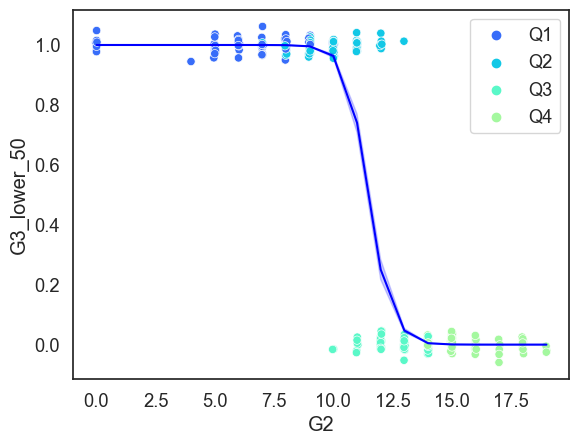

In [40]:
def jitter(values,j):
    return values + np.random.normal(j,0.02,values.shape)
sns.scatterplot(x = jitter(nested_train.G2,0), y = jitter(nested_train.G3_lower_50,0), data = nested_train, hue = nested_train.G3_binned)
logit_model_1 = smf.logit(formula = 'G3_lower_50~G1+G2', data = nested_train).fit() #Developing logistic regression model
sns.lineplot(x = 'G2', y= logit_model_1.predict(nested_train), data = nested_train, color = 'blue') #Visualizing model

In [41]:
logit_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            G3_lower_50   No. Observations:                  316
Model:                          Logit   Df Residuals:                      313
Method:                           MLE   Df Model:                            2
Date:                Mon, 27 Feb 2023   Pseudo R-squ.:                  0.8077
Time:                        17:33:51   Log-Likelihood:                -41.580
converged:                       True   LL-Null:                       -216.24
Covariance Type:            nonrobust   LLR p-value:                 1.407e-76
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.1825      3.731      6.750      0.000      17.871      32.494
G1            -0.2934      0.189     -1.549      0.121      -0.665       0.078
G2            -1.8971      0.328     -5.779      0.000      -2.541      -1.254
==============================================================================

Possibly complete quasi-separation: A fraction 0.26 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [42]:
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    #fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    #auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    #print("ROC-AUC = {:.1%}".format(auc_value))

Classification accuracy = 94.3%
Precision = 95.0%
TPR or Recall = 95.0%
FNR = 5.0%
FPR = 6.6%


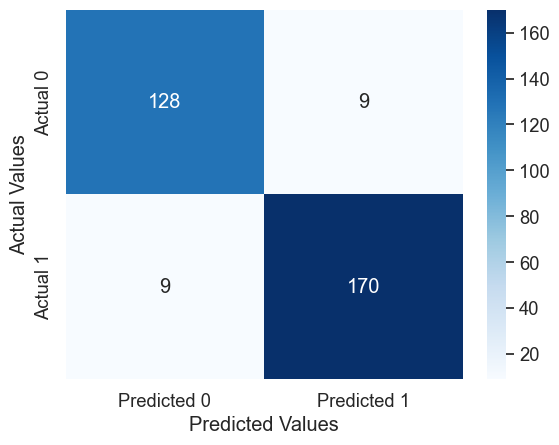

In [43]:
confusion_matrix_data(nested_train,nested_train.G3_lower_50,logit_model_1, 0.5)

In [44]:
nested_train['pred_lower_50']= (logit_model_1.predict(nested_train) > .5).astype(int)

/var/folders/br/3xh62c4n08ng93pgxzm06_f80000gn/T/ipykernel_23908/3069335396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nested_train['pred_lower_50']= (logit_model_1.predict(nested_train) > .5).astype(int)


In [45]:
lower_50 = nested_train[nested_train['pred_lower_50'] ==1]

In [46]:
lower_50['Q1'] = (lower_50['G3_binned']=='Q1').astype(int)

/var/folders/br/3xh62c4n08ng93pgxzm06_f80000gn/T/ipykernel_23908/937596360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_50['Q1'] = (lower_50['G3_binned']=='Q1').astype(int)


Optimization terminated successfully.
         Current function value: 0.284866
         Iterations 8


<AxesSubplot: xlabel='G2', ylabel='Q1'>

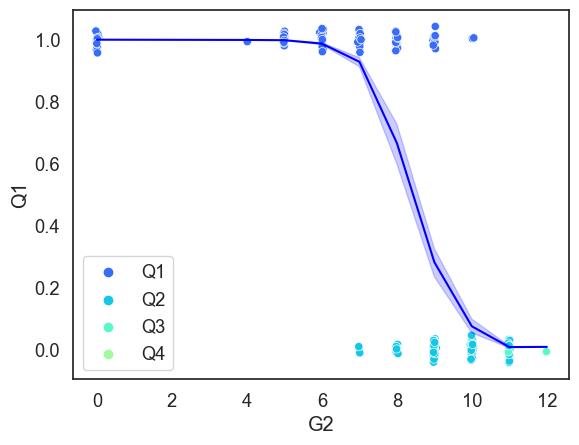

In [47]:
sns.scatterplot(x = jitter(lower_50.G2,0), y = jitter(lower_50.Q1,0), data = lower_50, hue = lower_50.G3_binned)
logit_model_2 = smf.logit(formula = 'Q1~G1+G2', data = lower_50).fit()
sns.lineplot(x = 'G2', y= logit_model_2.predict(lower_50), data = lower_50, color = 'blue') #Visualizing model

Classification accuracy = 89.9%
Precision = 91.2%
TPR or Recall = 86.9%
FNR = 13.1%
FPR = 7.4%


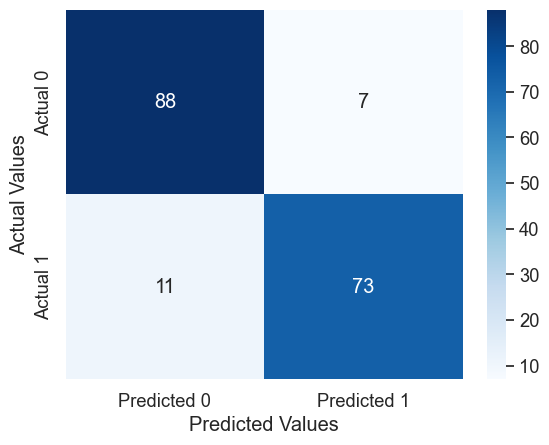

In [48]:
confusion_matrix_data(lower_50,lower_50.Q1,logit_model_2, 0.5)

In [49]:
lower_50['pred_Q1'] = (logit_model_2.predict(lower_50) > 0.5).astype(int)

/var/folders/br/3xh62c4n08ng93pgxzm06_f80000gn/T/ipykernel_23908/1409965764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_50['pred_Q1'] = (logit_model_2.predict(lower_50) > 0.5).astype(int)


In [50]:
lower_50['pred'] = np.where(lower_50['pred_Q1'], 'Q1', 'Q2')

/var/folders/br/3xh62c4n08ng93pgxzm06_f80000gn/T/ipykernel_23908/1985233880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_50['pred'] = np.where(lower_50['pred_Q1'], 'Q1', 'Q2')


In [51]:
upper_50 = nested_train[nested_train['pred_lower_50'] ==0]
upper_50['Q4'] = (upper_50['G3_binned']=='Q4').astype(int)

/var/folders/br/3xh62c4n08ng93pgxzm06_f80000gn/T/ipykernel_23908/4256824296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upper_50['Q4'] = (upper_50['G3_binned']=='Q4').astype(int)


Optimization terminated successfully.
         Current function value: 0.158179
         Iterations 9


<AxesSubplot: xlabel='G2', ylabel='Q4'>

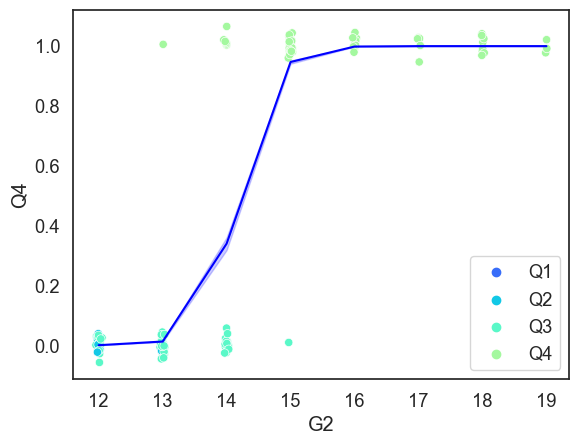

In [52]:
sns.scatterplot(x = jitter(upper_50.G2,0), y = jitter(upper_50.Q4,0), data = upper_50, hue = upper_50.G3_binned)
logit_model_3 = smf.logit(formula = 'Q4~G1+G2', data = upper_50).fit()
sns.lineplot(x = 'G2', y= logit_model_3.predict(upper_50), data = upper_50, color = 'blue') #Visualizing model

Classification accuracy = 94.2%
Precision = 98.2%
TPR or Recall = 88.9%
FNR = 11.1%
FPR = 1.4%


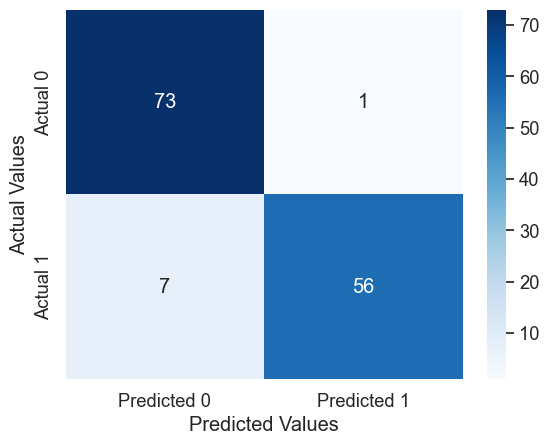

In [53]:
confusion_matrix_data(upper_50,upper_50.Q4,logit_model_3, 0.5)

In [54]:
upper_50['pred_Q4'] = (logit_model_3.predict(upper_50) > 0.5).astype(int)
upper_50['pred'] = np.where(upper_50['pred_Q4'], 'Q4', 'Q3')

/var/folders/br/3xh62c4n08ng93pgxzm06_f80000gn/T/ipykernel_23908/2195489357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upper_50['pred_Q4'] = (logit_model_3.predict(upper_50) > 0.5).astype(int)
/var/folders/br/3xh62c4n08ng93pgxzm06_f80000gn/T/ipykernel_23908/2195489357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upper_50['pred'] = np.where(upper_50['pred_Q4'], 'Q4', 'Q3')


In [55]:
nested_train['pred'] = lower_50['pred']
nested_train = nested_train.fillna({'pred': upper_50['pred']})

/var/folders/br/3xh62c4n08ng93pgxzm06_f80000gn/T/ipykernel_23908/619936150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nested_train['pred'] = lower_50['pred']


In [56]:
nested_train['pred_v_actual'] = nested_train['G3_binned'] == nested_train['pred']

In [57]:
nested_train.head()

,G1,G2,G3,G3_binned,G3_lower_50,pred_lower_50,pred,pred_v_actual
23,13,13,12,Q3,0,0,Q3,True
296,10,9,0,Q1,1,1,Q2,False
13,10,10,11,Q2,1,1,Q2,True
249,13,15,15,Q4,0,0,Q4,True
61,10,8,11,Q2,1,1,Q2,True


In [58]:
nested_train['pred_v_actual'].sum()

272

In [59]:
nested_train['pred_v_actual'].sum()/nested_train.shape[0]

0.8607594936708861

**Accuracy of predicting the quartile is 86% on train data.**

### With test data

In [60]:
nested_test['pred_lower_50']= (logit_model_1.predict(nested_test) > .5).astype(int)

/var/folders/br/3xh62c4n08ng93pgxzm06_f80000gn/T/ipykernel_23908/224154811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nested_test['pred_lower_50']= (logit_model_1.predict(nested_test) > .5).astype(int)


Classification accuracy = 91.1%
Precision = 98.0%
TPR or Recall = 88.9%
FNR = 11.1%
FPR = 4.0%


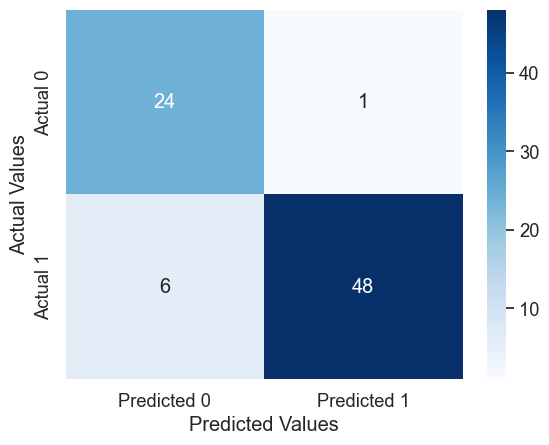

In [61]:
confusion_matrix_data(nested_test,nested_test.G3_lower_50,logit_model_1, 0.5)

In [62]:
test_lower_50 = nested_test[nested_test['pred_lower_50'] ==1]
test_lower_50['Q1'] = (test_lower_50['G3_binned']=='Q1').astype(int)
test_lower_50['pred_Q1'] = (logit_model_2.predict(test_lower_50) > 0.5).astype(int)
test_lower_50['pred'] = np.where(test_lower_50['pred_Q1'], 'Q1', 'Q2')

/var/folders/br/3xh62c4n08ng93pgxzm06_f80000gn/T/ipykernel_23908/376779482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_lower_50['Q1'] = (test_lower_50['G3_binned']=='Q1').astype(int)
/var/folders/br/3xh62c4n08ng93pgxzm06_f80000gn/T/ipykernel_23908/376779482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_lower_50['pred_Q1'] = (logit_model_2.predict(test_lower_50) > 0.5).astype(int)
/var/folders/br/3xh62c4n08ng93pgxzm06_f80000gn/T/ipykernel_23908/376779482.py:4: SettingWithCopyWarning: 

In [63]:
test_upper_50 = nested_test[nested_test['pred_lower_50'] ==0]
test_upper_50['Q4'] = (test_upper_50['G3_binned']=='Q4').astype(int)
test_upper_50['pred_Q4'] = (logit_model_3.predict(test_upper_50) > 0.5).astype(int)
test_upper_50['pred'] = np.where(test_upper_50['pred_Q4'], 'Q4', 'Q3')

/var/folders/br/3xh62c4n08ng93pgxzm06_f80000gn/T/ipykernel_23908/1420430791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_upper_50['Q4'] = (test_upper_50['G3_binned']=='Q4').astype(int)
/var/folders/br/3xh62c4n08ng93pgxzm06_f80000gn/T/ipykernel_23908/1420430791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_upper_50['pred_Q4'] = (logit_model_3.predict(test_upper_50) > 0.5).astype(int)
/var/folders/br/3xh62c4n08ng93pgxzm06_f80000gn/T/ipykernel_23908/1420430791.py:4: SettingWithCopyWarnin

In [64]:
nested_test['pred'] = test_lower_50['pred']
nested_test = nested_test.fillna({'pred': test_upper_50['pred']})
nested_test['pred_v_actual'] = nested_test['G3_binned'] == nested_test['pred']

/var/folders/br/3xh62c4n08ng93pgxzm06_f80000gn/T/ipykernel_23908/2592613888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nested_test['pred'] = test_lower_50['pred']


In [65]:
nested_test['pred_v_actual'].sum()/nested_test.shape[0]

0.8481012658227848

**84% accuracy on the test data.**

### Linear model

In [66]:
lm = smf.ols('G3 ~  G1 + G2', data = train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     754.2
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          2.00e-120
Time:                        17:33:52   Log-Likelihood:                -663.82
No. Observations:                 316   AIC:                             1334.
Df Residuals:                     313   BIC:                             1345.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8354      0.381     -4.815      0.000      -2.585      -1.085
G1             0.1687      0.063      2.666      0.008       0.044       0.293
G2             0.9736      0.054     18.120      0.000       0.868       1.079
==============================================================================
Omnibus:                      197.203   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1328.169
Skew:                          -2.640   Prob(JB):                    3.91e-289
Kurtosis:                      11.544   Cond. No.                         55.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
pred_test = lm.predict(test)
data = pd.concat([pred_test, y_test], axis = 1)

Text(0, 0.5, 'Predicted grade')

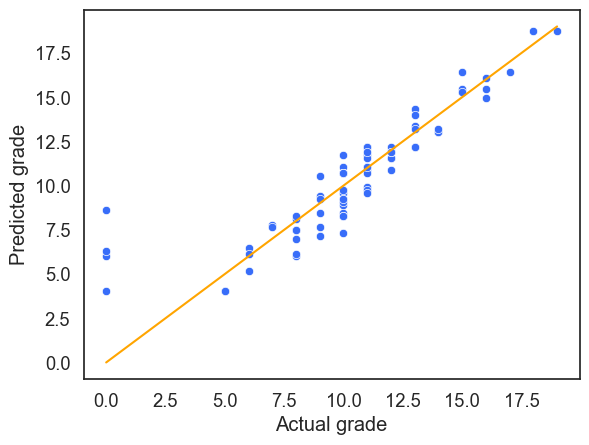

In [68]:
sns.scatterplot(x = test.G3, y = pred_test)
#In case of a perfect prediction, all the points must lie on the line x = y.
sns.lineplot(x = [0,test.G3.max()], y = [0,test.G3.max()],color='orange') #Plotting the line x = y.
plt.xlabel('Actual grade')
plt.ylabel('Predicted grade')

Using the linear model, we were unable to identify the students who had a final grade of 0 from their G1 and G2, which would not be ideal if we want to identify students who might need more support.

# Model about Progress

In [69]:
train['G1_G2'] = 0
train.loc[train.G2 > train.G1, 'G1_G2'] = 1
train['G2_G3'] = 0
train.loc[train.G3 > train.G2, 'G2_G3'] = 1

In [120]:
train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,health,absences,G1,G2,G3,alc,G1_G2,G2_G3
23,0,1,16,1,1,1,2,2,0,0,...,4,4,5,0,13,13,12,6,0,0
296,0,0,19,1,0,1,4,4,3,0,...,3,4,2,0,10,9,0,5,0,0
13,0,1,15,1,0,1,4,3,4,0,...,4,3,3,2,10,10,11,3,0,1
249,0,1,16,1,0,1,0,2,0,0,...,3,2,5,0,13,15,15,6,1,0
61,0,0,16,1,0,1,1,1,2,2,...,5,5,5,6,10,8,11,10,0,1


In [119]:
pro_model = smf.logit(formula = 'G1_G2~absences+romantic+failures+schoolsup+alc+Fjob', data = train).fit()
pro_model.summary()

Optimization terminated successfully.
         Current function value: 0.614445
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  G1_G2   No. Observations:                  316
Model:                          Logit   Df Residuals:                      309
Method:                           MLE   Df Model:                            6
Date:                Mon, 27 Feb 2023   Pseudo R-squ.:                 0.03015
Time:                        17:40:32   Log-Likelihood:                -194.16
converged:                       True   LL-Null:                       -200.20
Covariance Type:            nonrobust   LLR p-value:                   0.06034
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3124      0.303     -1.030      0.303      -0.907       0.282
absences      -0.0260      0.019     -1.357      0.175      -0.064       0.012
romantic      -0.5446      0.275     -1.977      0.048      -1.084      -0.005
failures      -0.2783      0.203     -1.372      0.170      -0.676       0.119
schoolsup      0.4720      0.379      1.245      0.213      -0.271       1.215
alc           -0.0082      0.065     -0.126      0.900      -0.135       0.119
Fjob          -0.0458      0.095     -0.483      0.629      -0.232       0.140
==============================================================================
"""

Classification accuracy = 53.2%
Precision = 38.7%
TPR or Recall = 72.1%
FNR = 27.9%
FPR = 56.1%


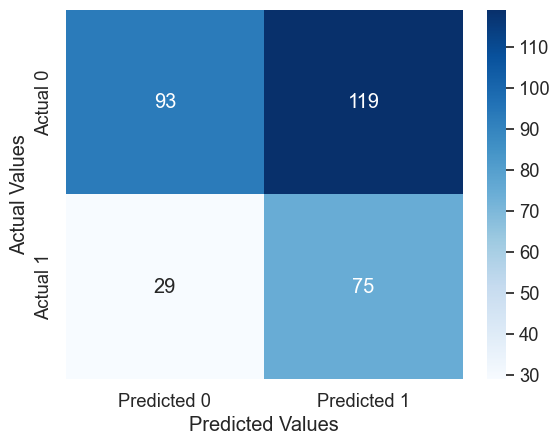

In [90]:
confusion_matrix_data(train,train.G1_G2,pro_model, 0.3)

The previously useful predictors do not seem to function here.

In [91]:
train.G1_G2.value_counts()

0    212
1    104
Name: G1_G2, dtype: int64

Text(0.5, 1.0, 'Internet Access vs G1 G2 Progress')

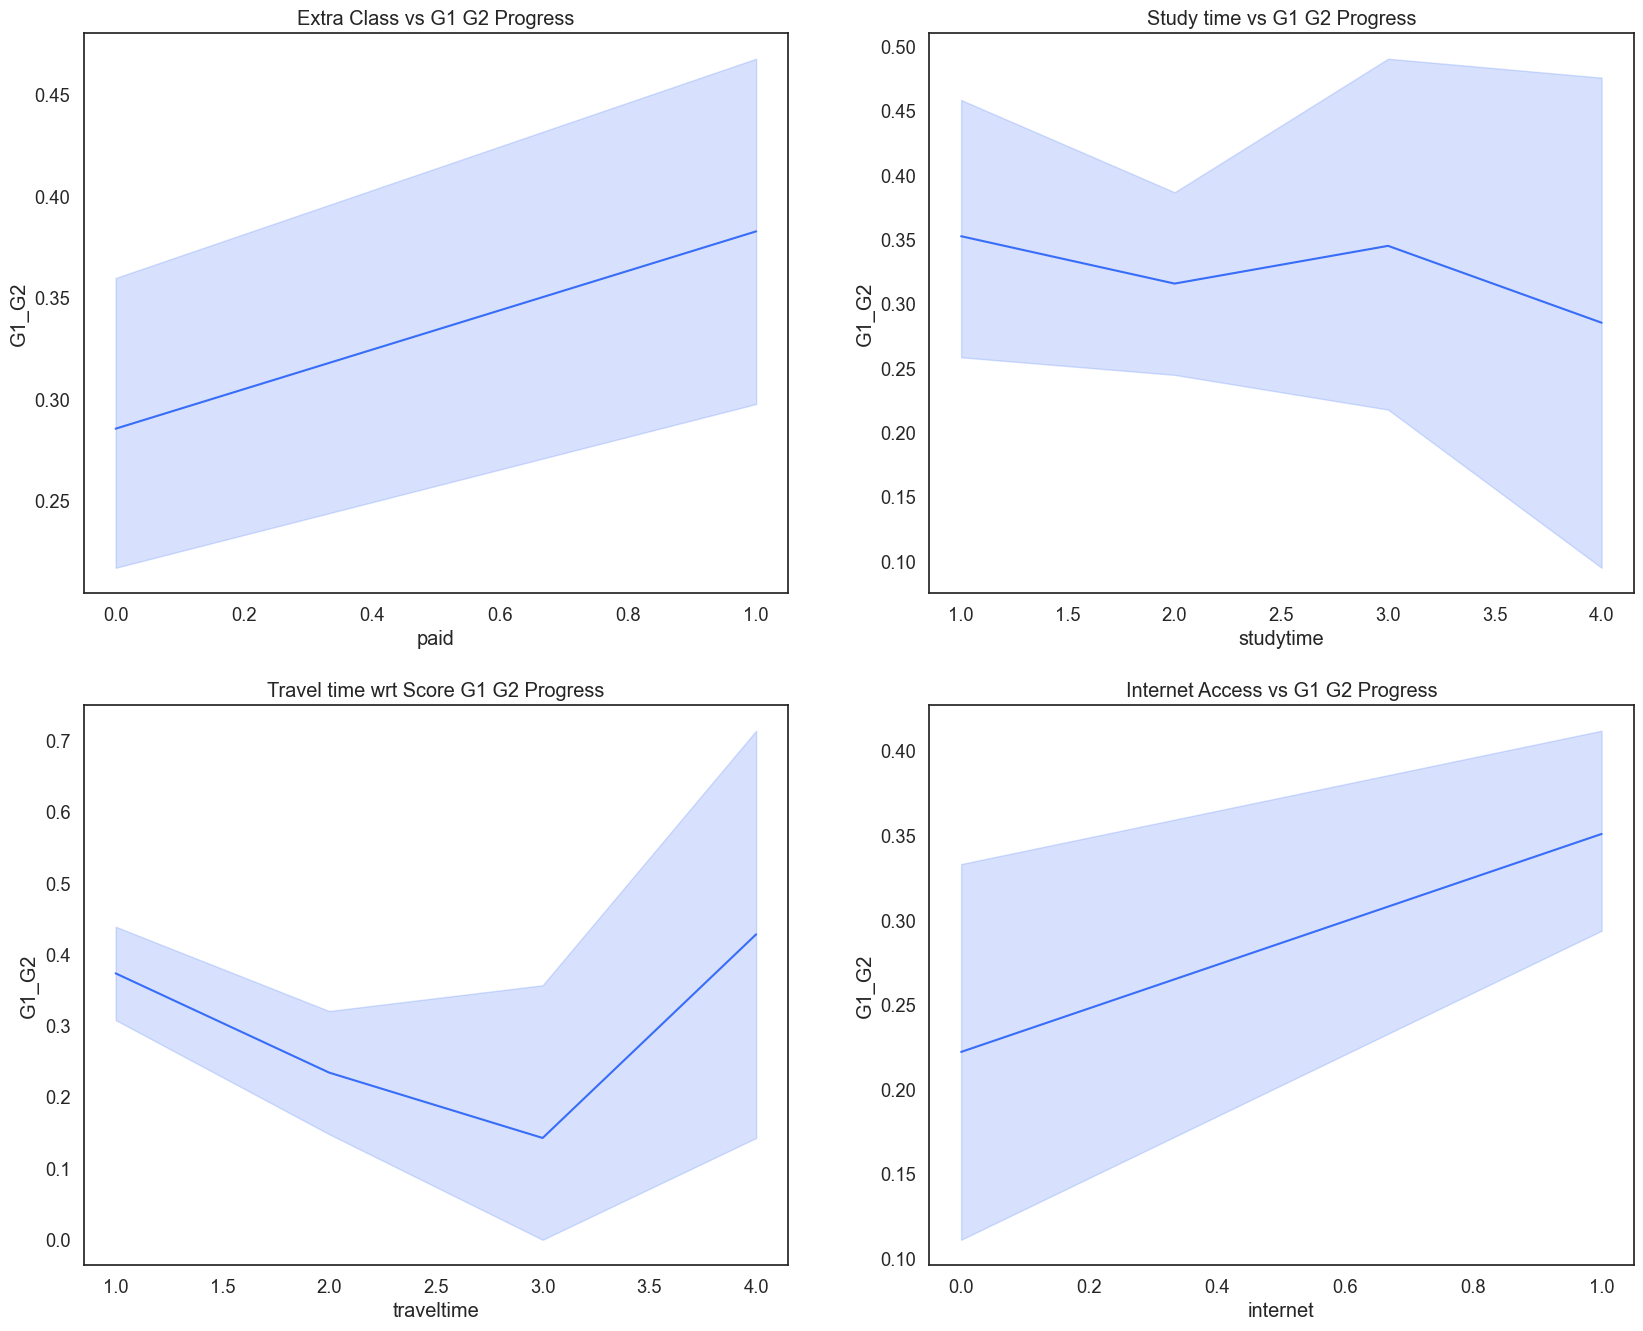

In [74]:
fig = plt.figure(figsize=(20, 16))
fig.add_subplot(2, 2, 1)

sns.lineplot(x='paid', y='G1_G2', data=train, estimator = lambda y: sum(y == 1)/len(y)).set_title('Extra Class vs G1 G2 Progress')

fig.add_subplot(2, 2, 2)
sns.lineplot(x='studytime', y='G1_G2', data=train, estimator = lambda y: sum(y == 1)/len(y)).set_title('Study time vs G1 G2 Progress')

fig.add_subplot(2, 2, 3)
sns.lineplot(x='traveltime', y='G1_G2', data=train, estimator = lambda y: sum(y == 1)/len(y)).set_title('Travel time wrt Score G1 G2 Progress')

fig.add_subplot(2, 2, 4)
sns.lineplot(x='internet', y='G1_G2', data=train, estimator = lambda y: sum(y == 1)/len(y)).set_title('Internet Access vs G1 G2 Progress')


Text(0.5, 1.0, 'Absences vs G1 G2 Progress')

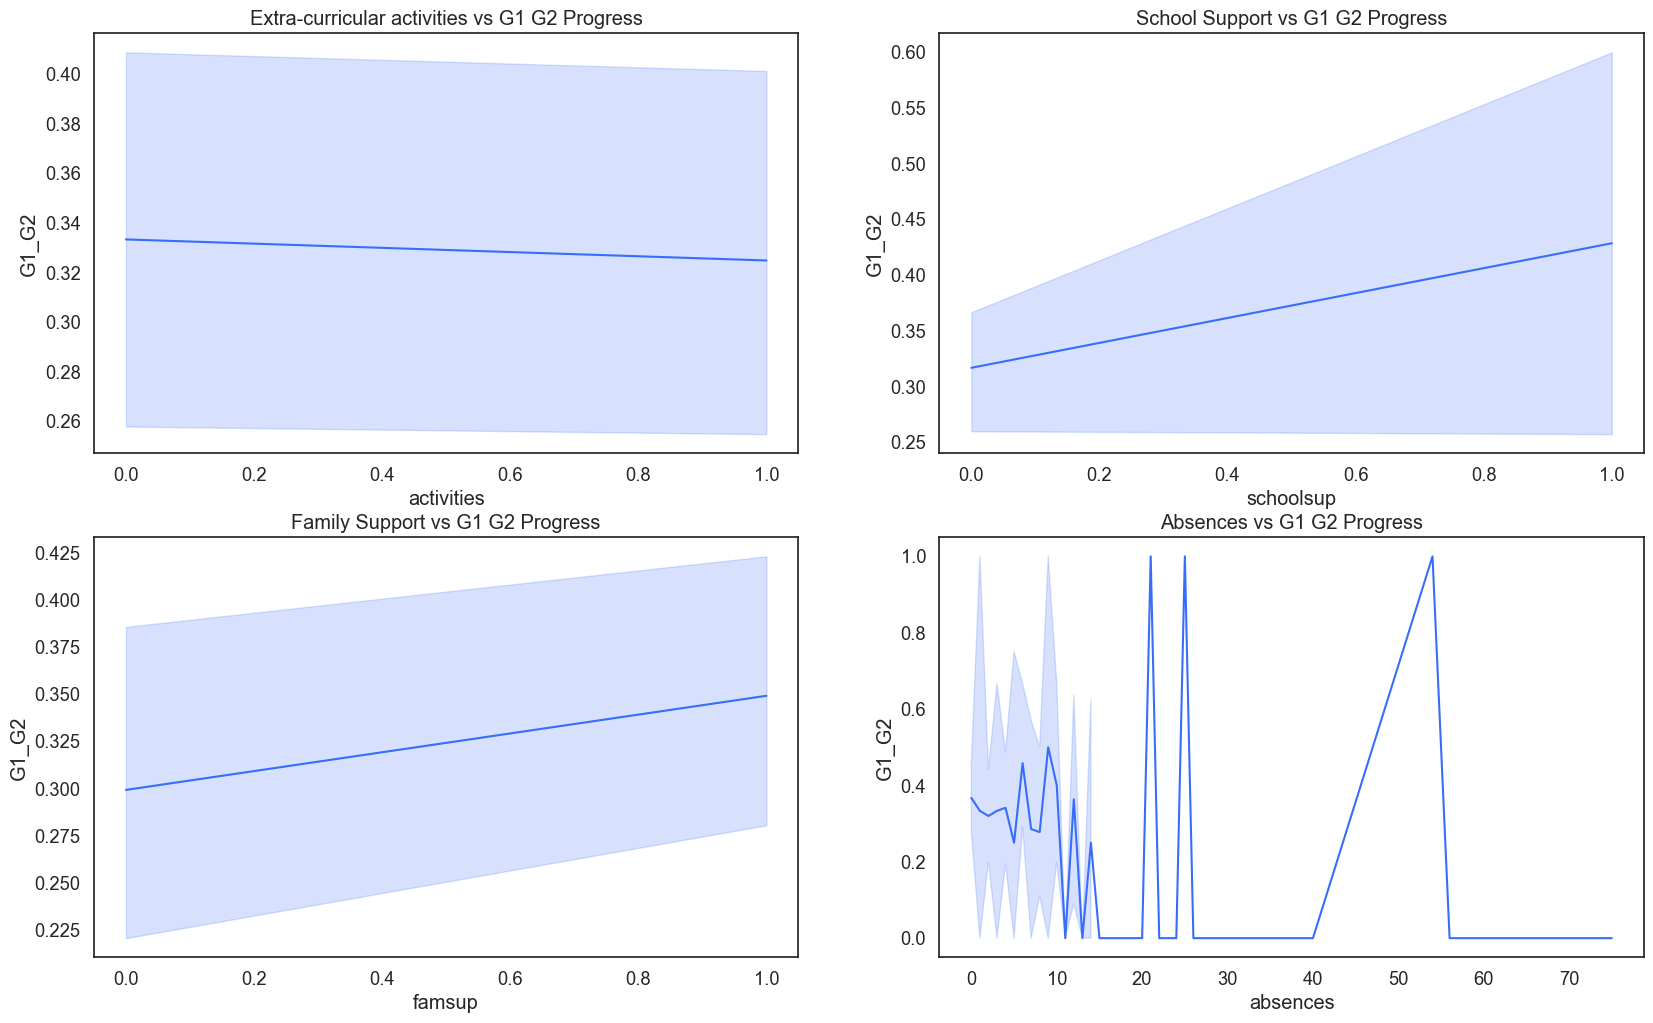

In [92]:
fig = plt.figure(figsize=(20, 12))
fig.add_subplot(2, 2, 1)
sns.lineplot(x='activities', y='G1_G2', data=train, estimator = lambda y: sum(y == 1)/len(y)).set_title('Extra-curricular activities vs G1 G2 Progress')
fig.add_subplot(2, 2, 2)
sns.lineplot(x='schoolsup', y='G1_G2', data=train, estimator = lambda y: sum(y == 1)/len(y)).set_title('School Support vs G1 G2 Progress')
fig.add_subplot(2, 2, 3)
sns.lineplot(x='famsup', y='G1_G2', data=train, estimator = lambda y: sum(y == 1)/len(y)).set_title('Family Support vs G1 G2 Progress')
fig.add_subplot(2, 2, 4)
sns.lineplot(x='absences', y='G1_G2', data=train, estimator = lambda y: sum(y == 1)/len(y)).set_title('Absences vs G1 G2 Progress')

Text(0.5, 1.0, 'Romantic Relationship vs G1 G2 Progress')

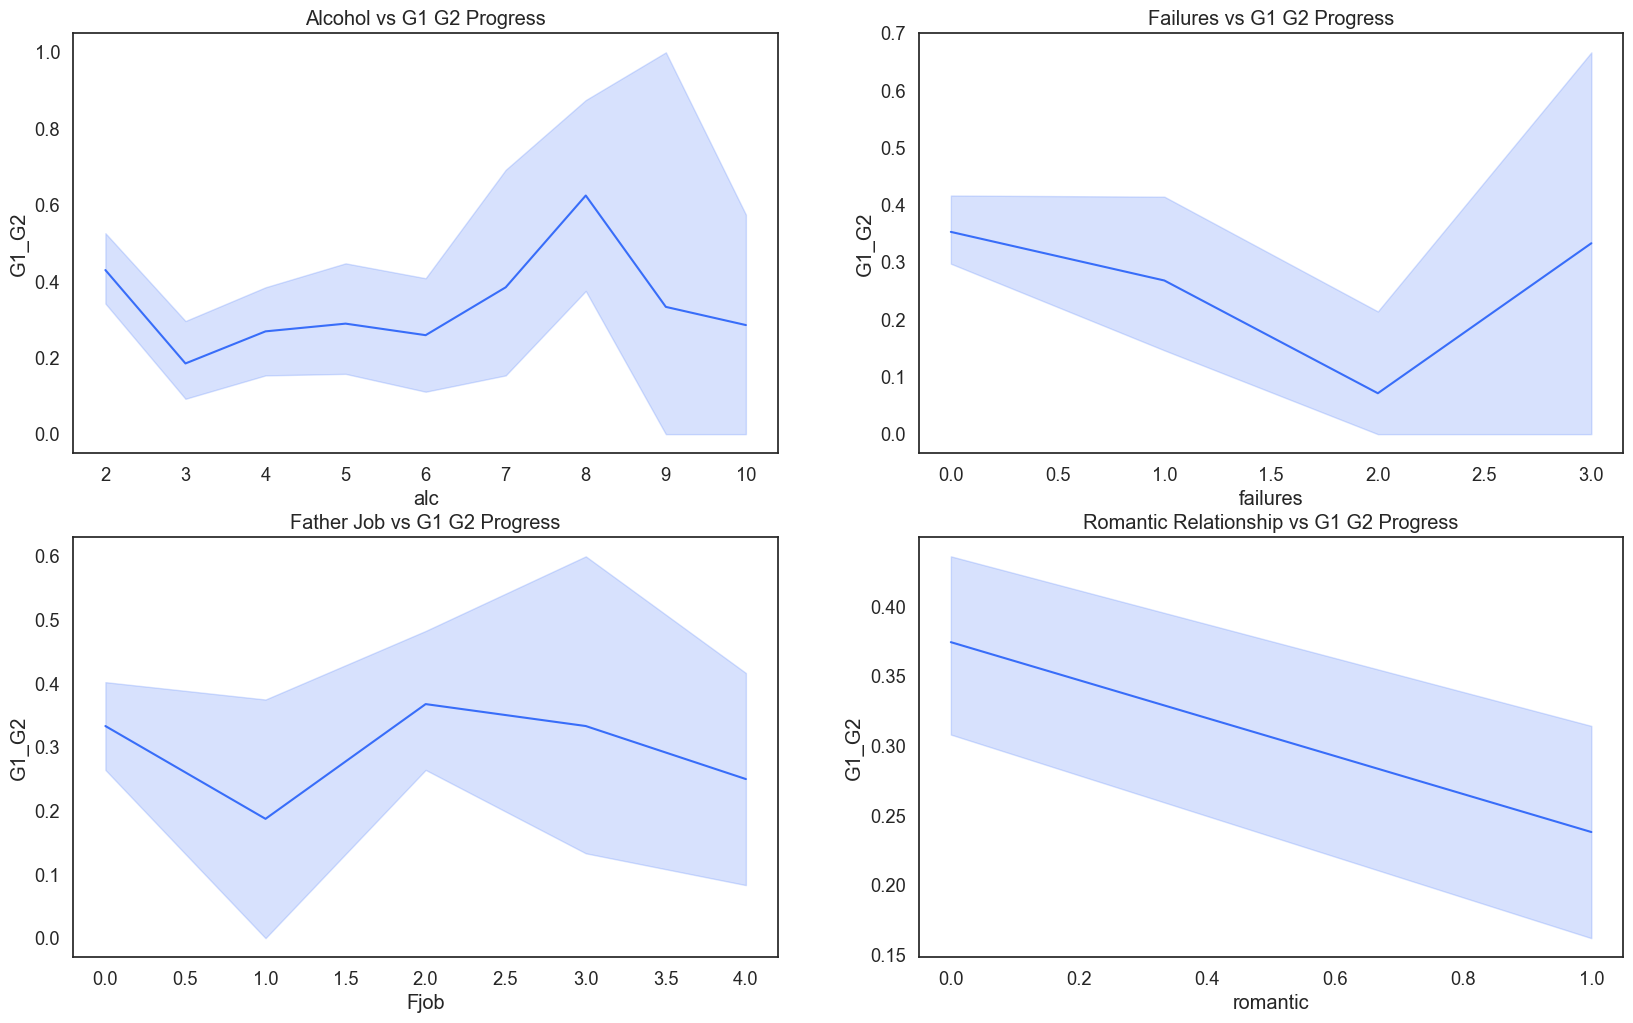

In [93]:
fig = plt.figure(figsize=(20, 12))
fig.add_subplot(2, 2, 1)
sns.lineplot(x='alc', y='G1_G2',  data=train, estimator = lambda y: sum(y == 1)/len(y)).set_title('Alcohol vs G1 G2 Progress')
fig.add_subplot(2, 2, 2)
sns.lineplot(x='failures', y='G1_G2',  data=train, estimator = lambda y: sum(y == 1)/len(y)).set_title('Failures vs G1 G2 Progress')
fig.add_subplot(2, 2, 3)
sns.lineplot(x='Fjob', y='G1_G2',  data=train, estimator = lambda y: sum(y == 1)/len(y)).set_title('Father Job vs G1 G2 Progress')
fig.add_subplot(2, 2, 4)
sns.lineplot(x='romantic', y='G1_G2',  data=train, estimator = lambda y: sum(y == 1)/len(y)).set_title('Romantic Relationship vs G1 G2 Progress')

In [77]:
pro_model2 = smf.logit(formula = 'G1_G2~paid+traveltime+I(traveltime**2)+alc*studytime+romantic+internet+Medu*Fedu+failures', data = train).fit()
pro_model2.summary()

Optimization terminated successfully.
         Current function value: 0.592909
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  G1_G2   No. Observations:                  316
Model:                          Logit   Df Residuals:                      303
Method:                           MLE   Df Model:                           12
Date:                Mon, 27 Feb 2023   Pseudo R-squ.:                 0.06415
Time:                        17:33:55   Log-Likelihood:                -187.36
converged:                       True   LL-Null:                       -200.20
Covariance Type:            nonrobust   LLR p-value:                   0.01189
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3085      1.380      0.223      0.823      -2.397       3.014
paid                   0.4379      0.264      1.661      0.097      -0.079       0.954
traveltime            -2.1991      0.860     -2.556      0.011      -3.885      -0.513
I(traveltime ** 2)     0.4951      0.206      2.400      0.016       0.091       0.899
alc                    0.0752      0.167      0.451      0.652      -0.252       0.402
studytime              0.0706      0.326      0.217      0.829      -0.569       0.710
alc:studytime         -0.0779      0.085     -0.914      0.361      -0.245       0.089
romantic              -0.6841      0.283     -2.420      0.015      -1.238      -0.130
internet               0.4788      0.372      1.288      0.198      -0.250       1.207
Medu                   0.3320      0.339      0.978      0.328      -0.333       0.997
Fedu                   0.0555      0.417      0.133      0.894      -0.761       0.873
Medu:Fedu             -0.0555      0.130     -0.426      0.670      -0.311       0.200
failures              -0.1964      0.214     -0.918      0.358      -0.616       0.223
======================================================================================
"""

Classification accuracy = 61.7%
Precision = 44.1%
TPR or Recall = 60.6%
FNR = 39.4%
FPR = 37.7%


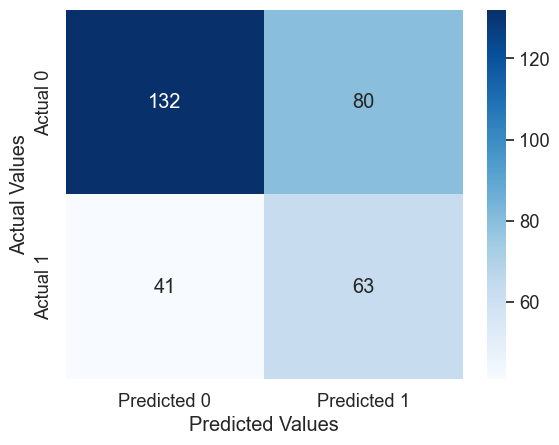

In [78]:
confusion_matrix_data(train,train.G1_G2,pro_model2, 0.35)

0.664391328011611


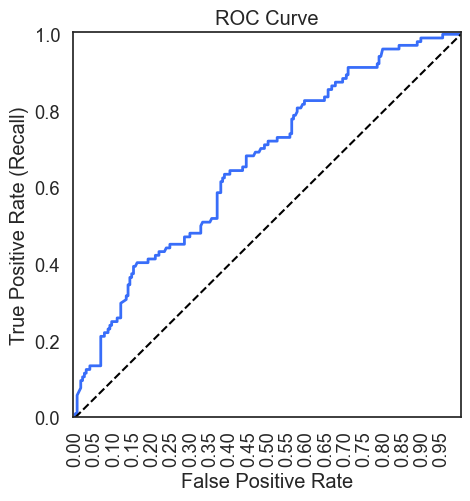

In [94]:
from sklearn.metrics import roc_curve, auc
y=train.G1_G2
ypred = pro_model2.predict(train)
fpr, tpr, auc_thresholds = roc_curve(y, ypred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(5,5))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, ypred)
plot_roc_curve(fpr, tpr)
print(auc(fpr, tpr))

In [80]:
test['G1_G2'] = 0
test.loc[test.G2 > test.G1, 'G1_G2'] = 1
test['G2_G3'] = 0
test.loc[test.G3 > test.G2, 'G2_G3'] = 1

Classification accuracy = 49.4%
Precision = 23.3%
TPR or Recall = 29.2%
FNR = 70.8%
FPR = 41.8%


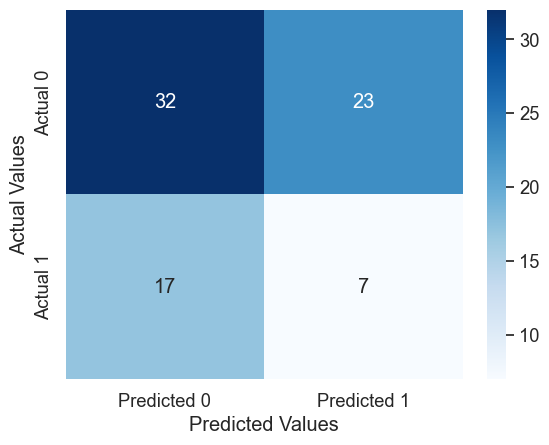

In [81]:
confusion_matrix_data(test,test.G1_G2,pro_model2, 0.35)

Text(0.5, 1.0, 'Internet Access vs G2_G3 Progress')

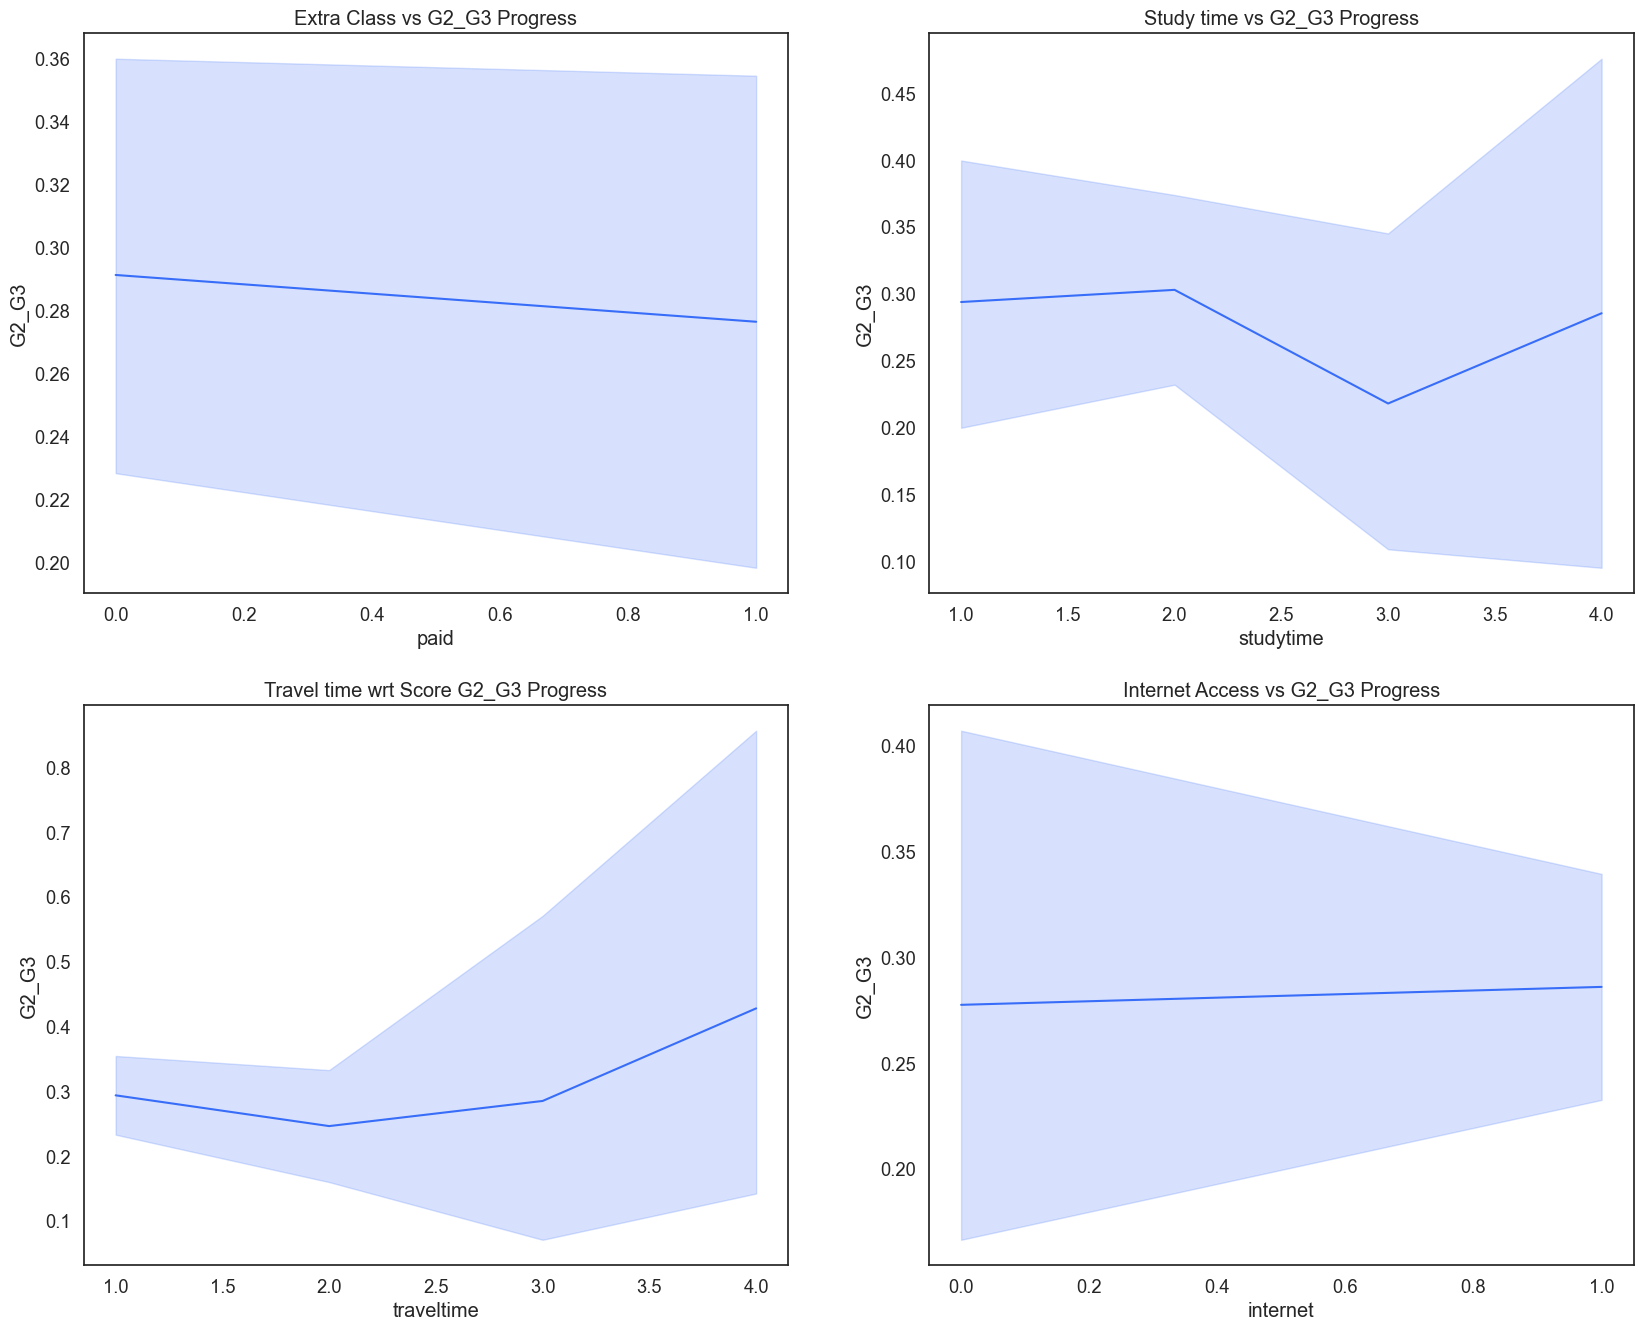

In [82]:
fig = plt.figure(figsize=(20, 16))
fig.add_subplot(2, 2, 1)

sns.lineplot(x='paid', y='G2_G3', data=train, estimator = lambda y: sum(y == 1)/len(y)).set_title('Extra Class vs G2_G3 Progress')

fig.add_subplot(2, 2, 2)
sns.lineplot(x='studytime', y='G2_G3', data=train, estimator = lambda y: sum(y == 1)/len(y)).set_title('Study time vs G2_G3 Progress')

fig.add_subplot(2, 2, 3)
sns.lineplot(x='traveltime', y='G2_G3', data=train, estimator = lambda y: sum(y == 1)/len(y)).set_title('Travel time wrt Score G2_G3 Progress')

fig.add_subplot(2, 2, 4)
sns.lineplot(x='internet', y='G2_G3', data=train, estimator = lambda y: sum(y == 1)/len(y)).set_title('Internet Access vs G2_G3 Progress')


Text(0.5, 1.0, 'Absences vs G2_G3 Progress')

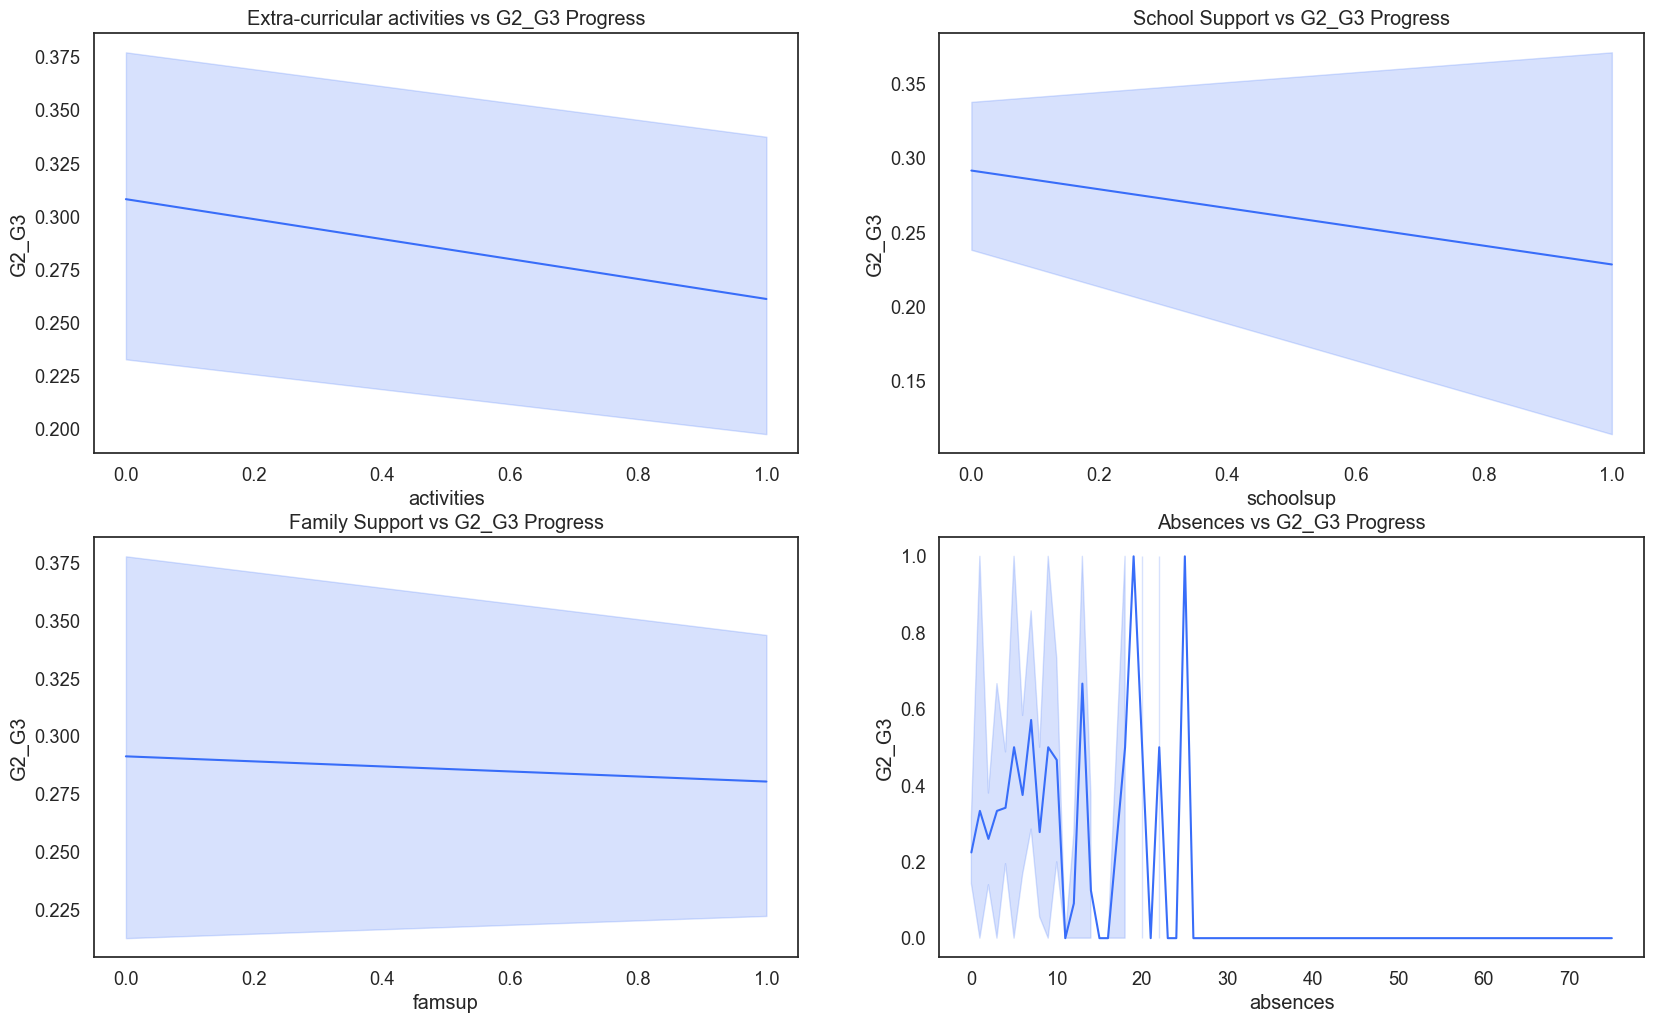

In [83]:
fig = plt.figure(figsize=(20, 12))
fig.add_subplot(2, 2, 1)
sns.lineplot(x='activities', y='G2_G3', data=train, estimator = lambda y: sum(y == 1)/len(y)).set_title('Extra-curricular activities vs G2_G3 Progress')
fig.add_subplot(2, 2, 2)
sns.lineplot(x='schoolsup', y='G2_G3', data=train, estimator = lambda y: sum(y == 1)/len(y)).set_title('School Support vs G2_G3 Progress')
fig.add_subplot(2, 2, 3)
sns.lineplot(x='famsup', y='G2_G3', data=train, estimator = lambda y: sum(y == 1)/len(y)).set_title('Family Support vs G2_G3 Progress')
fig.add_subplot(2, 2, 4)
sns.lineplot(x='absences', y='G2_G3', data=train, estimator = lambda y: sum(y == 1)/len(y)).set_title('Absences vs G2_G3 Progress')

Text(0.5, 1.0, 'Romantic Relationship vs G2_G3 Progress')

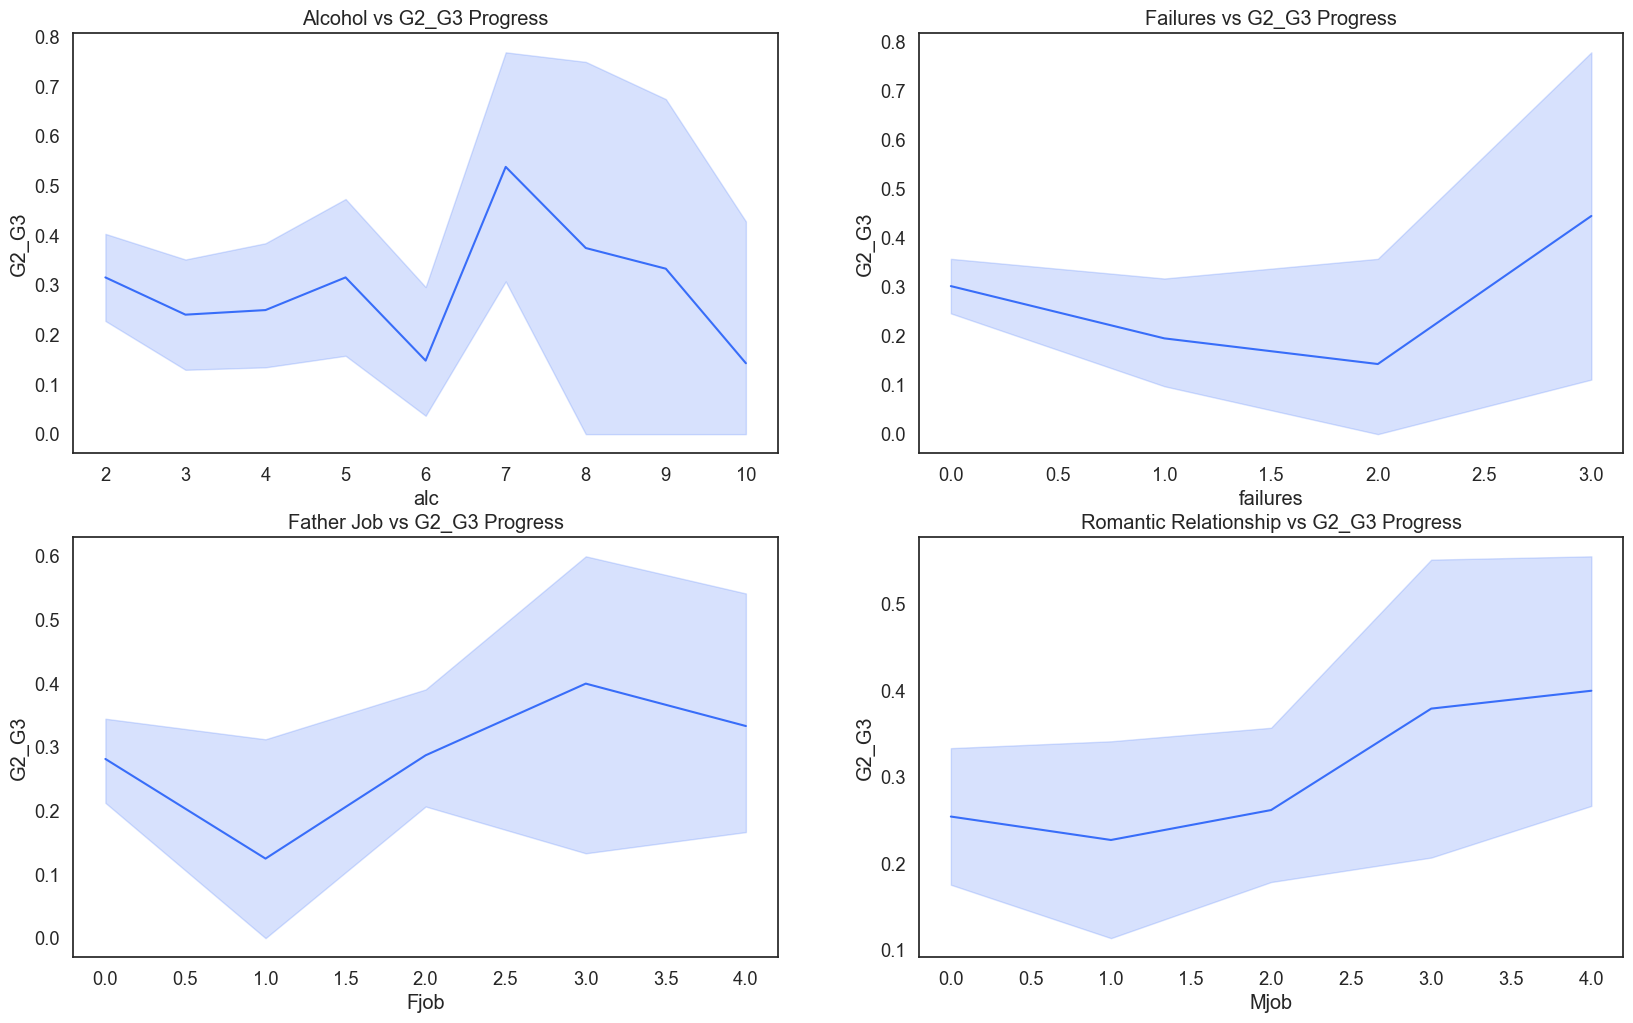

In [123]:
fig = plt.figure(figsize=(20, 12))
fig.add_subplot(2, 2, 1)
sns.lineplot(x='alc', y='G2_G3',  data=train, estimator = lambda y: sum(y == 1)/len(y)).set_title('Alcohol vs G2_G3 Progress')
fig.add_subplot(2, 2, 2)
sns.lineplot(x='failures', y='G2_G3',  data=train, estimator = lambda y: sum(y == 1)/len(y)).set_title('Failures vs G2_G3 Progress')
fig.add_subplot(2, 2, 3)
sns.lineplot(x='Fjob', y='G2_G3',  data=train, estimator = lambda y: sum(y == 1)/len(y)).set_title('Father Job vs G2_G3 Progress')
fig.add_subplot(2, 2, 4)
sns.lineplot(x='Mjob', y='G2_G3',  data=train, estimator = lambda y: sum(y == 1)/len(y)).set_title('Romantic Relationship vs G2_G3 Progress')

In [129]:
train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,health,absences,G1,G2,G3,alc,G1_G2,G2_G3
23,0,1,16,1,1,1,2,2,0,0,...,4,4,5,0,13,13,12,6,0,0
296,0,0,19,1,0,1,4,4,3,0,...,3,4,2,0,10,9,0,5,0,0
13,0,1,15,1,0,1,4,3,4,0,...,4,3,3,2,10,10,11,3,0,1
249,0,1,16,1,0,1,0,2,0,0,...,3,2,5,0,13,15,15,6,1,0
61,0,0,16,1,0,1,1,1,2,2,...,5,5,5,6,10,8,11,10,0,1


In [134]:
from sklearn.feature_selection import SelectKBest, chi2
k_best = SelectKBest(score_func=chi2, k=10)
k_best.fit(train, train.G2_G3)
df_score = pd.Series(data=k_best.scores_, index=train.columns)
df_score.sort_values(ascending=False)[1:10]

# features_selected = df_score.nlargest(3).index

G3          32.302784
Mjob         5.223718
absences     1.868059
famrel       1.807772
Medu         1.132180
Fjob         0.885752
reason       0.727058
address      0.610039
health       0.596451
dtype: float64

In [85]:
train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,health,absences,G1,G2,G3,alc,G1_G2,G2_G3
23,0,1,16,1,1,1,2,2,0,0,...,4,4,5,0,13,13,12,6,0,0
296,0,0,19,1,0,1,4,4,3,0,...,3,4,2,0,10,9,0,5,0,0
13,0,1,15,1,0,1,4,3,4,0,...,4,3,3,2,10,10,11,3,0,1
249,0,1,16,1,0,1,0,2,0,0,...,3,2,5,0,13,15,15,6,1,0
61,0,0,16,1,0,1,1,1,2,2,...,5,5,5,6,10,8,11,10,0,1


In [178]:
pro_model4444 = smf.logit(formula = 'G2_G3 ~ failures * absences+ Mjob * Fjob + famrel + Medu', data = train).fit()
pro_model4444.summary()

Optimization terminated successfully.
         Current function value: 0.569751
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  G2_G3   No. Observations:                  316
Model:                          Logit   Df Residuals:                      307
Method:                           MLE   Df Model:                            8
Date:                Mon, 27 Feb 2023   Pseudo R-squ.:                 0.04634
Time:                        17:53:44   Log-Likelihood:                -180.04
converged:                       True   LL-Null:                       -188.79
Covariance Type:            nonrobust   LLR p-value:                   0.02531
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.2348      0.794     -4.073      0.000      -4.791      -1.678
failures             -0.2965      0.278     -1.067      0.286      -0.841       0.248
absences             -0.0203      0.021     -0.948      0.343      -0.062       0.022
failures:absences     0.0536      0.030      1.796      0.073      -0.005       0.112
Mjob                  0.1593      0.131      1.219      0.223      -0.097       0.415
Fjob                  0.0103      0.171      0.060      0.952      -0.326       0.346
Mjob:Fjob            -0.0053      0.068     -0.078      0.938      -0.138       0.127
famrel                0.4630      0.158      2.938      0.003       0.154       0.772
Medu                  0.1009      0.146      0.693      0.488      -0.184       0.386
=====================================================================================
"""

Classification accuracy = 62.0%
Precision = 39.6%
TPR or Recall = 63.3%
FNR = 36.7%
FPR = 38.5%


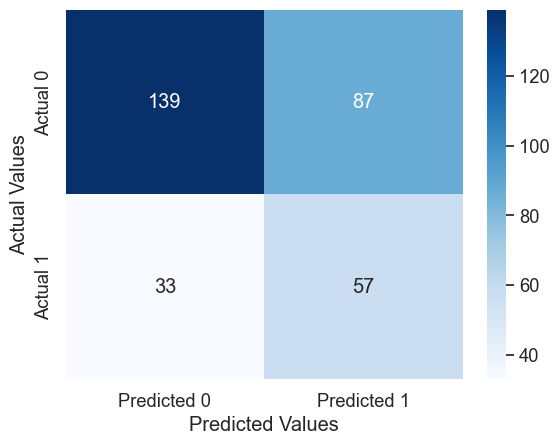

In [157]:
confusion_matrix_data(train,train.G2_G3,pro_model4444, 0.29)

In [162]:
pro_model3 = smf.logit(formula = 'G2_G3~failures*absences+I(failures**2)+Mjob + famrel', data = train).fit()
pro_model3.summary()

Optimization terminated successfully.
         Current function value: 0.560769
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  G2_G3   No. Observations:                  316
Model:                          Logit   Df Residuals:                      309
Method:                           MLE   Df Model:                            6
Date:                Mon, 27 Feb 2023   Pseudo R-squ.:                 0.06138
Time:                        17:51:19   Log-Likelihood:                -177.20
converged:                       True   LL-Null:                       -188.79
Covariance Type:            nonrobust   LLR p-value:                 0.0007397
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.9137      0.709     -4.110      0.000      -4.303      -1.524
failures             -1.9641      0.782     -2.511      0.012      -3.497      -0.431
absences             -0.0167      0.020     -0.815      0.415      -0.057       0.023
failures:absences     0.0773      0.032      2.430      0.015       0.015       0.140
I(failures ** 2)      0.6346      0.273      2.327      0.020       0.100       1.169
Mjob                  0.1942      0.091      2.131      0.033       0.016       0.373
famrel                0.4537      0.157      2.886      0.004       0.146       0.762
=====================================================================================
"""

Classification accuracy = 60.1%
Precision = 35.9%
TPR or Recall = 51.1%
FNR = 48.9%
FPR = 36.3%


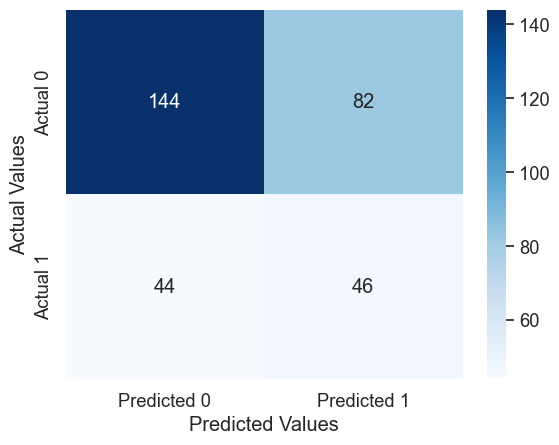

In [118]:
confusion_matrix_data(train,train.G2_G3,pro_model3, 0.3)

0.6008357915437561


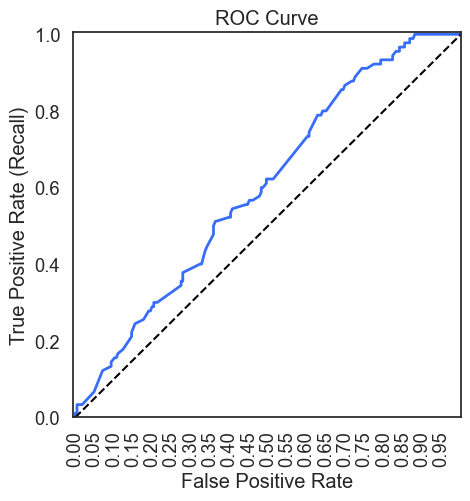

In [88]:
from sklearn.metrics import roc_curve, auc
y=train.G2_G3
ypred = pro_model3.predict(train)
fpr, tpr, auc_thresholds = roc_curve(y, ypred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(5,5))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, ypred)
plot_roc_curve(fpr, tpr)
print(auc(fpr, tpr))